Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Goal is to study the fuel data and predict and classify what kind of primary fuel is: if it is Solar, Coal, Wind, or Gas among others.

In addition to the previous prediction, we need to predict and calculate the electrical generating capacity in megawatts

The goal is to make prediction on  1) Primary Fuel: Classification    2) capacity_mw: Regression

In [1]:
!pip install xgboost

In [2]:
!pip install plotly

In [3]:
#import all libraries i may use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import plotly.graph_objs as go
import plotly.offline as py



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost
from xgboost import XGBClassifier


import os
import itertools


warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
#alt.renderers.enable("notebook")
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.linear_model import  LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split,KFold, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
#from keras.models import Sequential,model_from_json
#from keras.layers import Dense
#from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import RandomizedLasso,LassoLarsCV
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

%matplotlib inline

from scipy.stats import skew
from sklearn import preprocessing
import time
import pickle


from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error
import sklearn.metrics
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [4]:
#setup in order to show all the columns
pd.set_option('display.max_columns', None)

#fetching data and visualize it
df = pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN



We can see a lot of features that need conversion into numeric such as Name,Sex, Ticket, Cabin and Embarked.

Then, we also need to scale the data as we have features with different ranges.

We also need to manage missing vales and also NAN values. Then, start with missing/ NAN values.

In [5]:
#checking all the festures we have
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
#Get the number of rows and number of columns in the data
df.shape

(908, 25)

In [7]:
#data types, columns info and null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

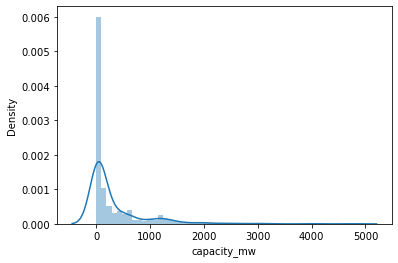

In [8]:
#let's plot the capacity_mw
sns.distplot(df['capacity_mw'])

We notice high frequency of density on the vale 0 or near to 0.

Text(0.5, 1.0, 'Capacity_mw per year')

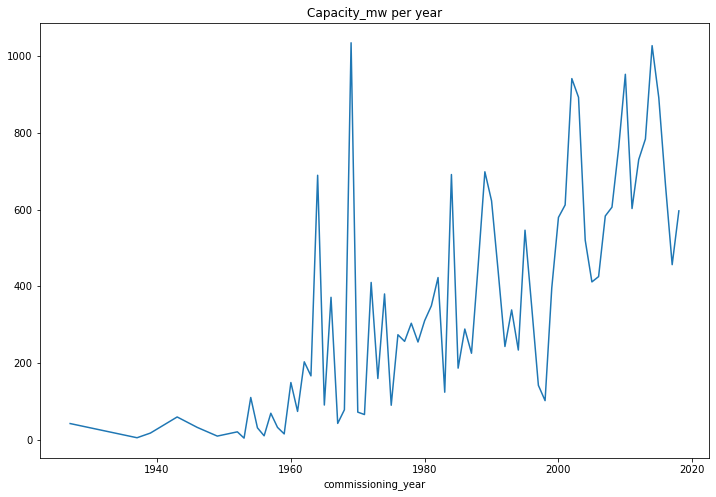

In [9]:
#plotting the Capacity_mx throughout the Years
byDate=df.groupby('commissioning_year').mean()
plt.figure(figsize=(12,8))
byDate['capacity_mw'].plot()
plt.title('Capacity_mw per year')    #haz lo con capacity_mw y años si hay

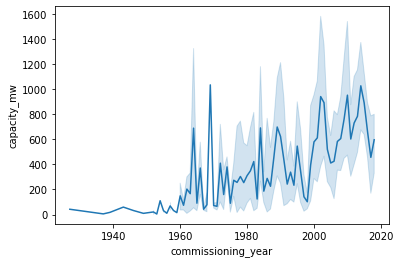

In [10]:
#justchecking the previos graph and comparing with the following one.
sns.lineplot(x = 'commissioning_year', y = 'capacity_mw', data=df)

We notice that the electrical generating capacity in megawatts increses over the years.

Above graph shows that there is positive variation between year 1960 and 2020.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d2d75a790>,
      dtype=object)

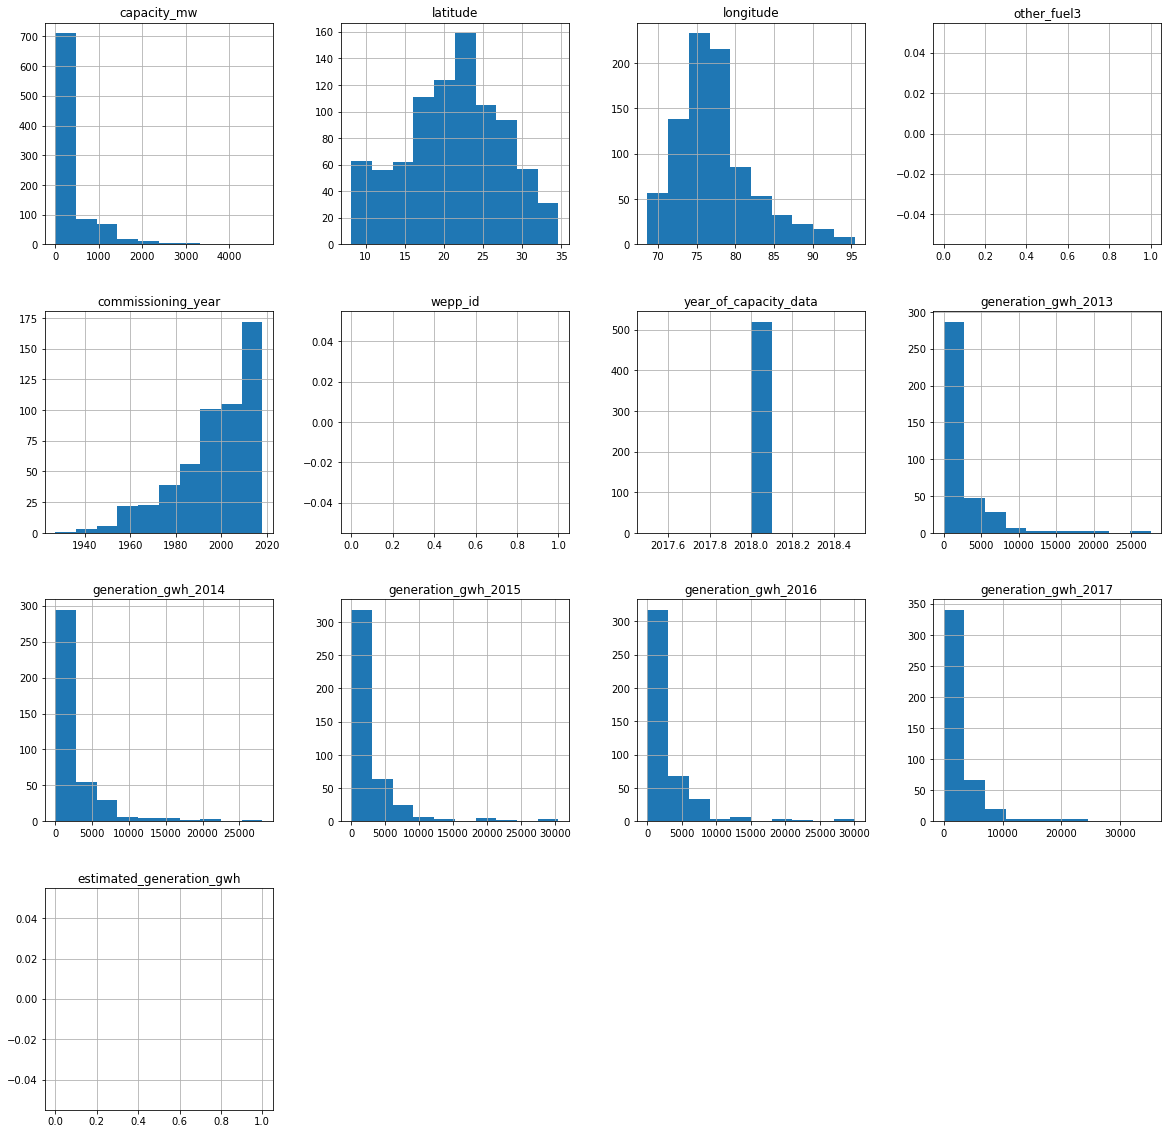

In [11]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4))

As expected, we see the skewness in the data we have.

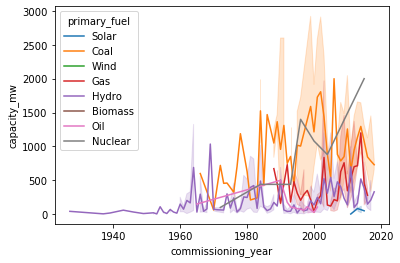

In [12]:
#plotting capacity_mw over the years by separating by primary fuel:

plt.figure(figsize=(6,4))
sns.lineplot(x="commissioning_year", y="capacity_mw", hue='primary_fuel', data=df)
plt.show() #Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

As we see in the previous plot graph, we easily notice the high capacity of generating coal and high capacitty of Hydro production overtime.

In [14]:
#we see some null values, let's check them:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [15]:
#lets check unique values we have in each column
print(df.nunique())

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64


In [ ]:
#please bear in mind we will delete the columns with just one unique value later.

In [16]:
#data types, columns info and null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [17]:
df['country'].unique() #will drop this one

array(['IND'], dtype=object)

In [18]:
df['country_long'].unique() #will dropthis one

array(['India'], dtype=object)

In [19]:
df['other_fuel2'].unique() #will drop this too

array([nan, 'Oil'], dtype=object)

In [20]:
df['other_fuel3'].unique() #will drop this one also

array([nan])

In [21]:
df['wepp_id'].unique() #will drop

array([nan])

In [22]:
df['year_of_capacity_data'].unique() #will drop as it only has 2018 that cannot be compared with other values of the column

array([  nan, 2018.])

In [23]:
df['generation_data_source'].unique() #will drop as its Central Elect Authority can not be comparaed with values of the same column as there is no more unique value for this column.

array([nan, 'Central Electricity Authority'], dtype=object)

In [24]:
df['estimated_generation_gwh'].unique() #will drop

array([nan])

In [25]:
df['primary_fuel'].nunique() #primary fuel has 8 different values.

8

In [27]:
df=df.drop(['country','country_long'],axis=1)  #droping columns country and country_long as they only have one unique value and all rows has the same unique values.
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [28]:
df['other_fuel1'].value_counts() #counting values of each type of other_fuel1   

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [29]:
df['latitude'] #checking latitude values

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
903    16.2949
904    12.8932
905    15.2758
906    24.3500
907     9.9344
Name: latitude, Length: 908, dtype: float64

In [30]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean()) #filling na with mean of feature latitude 
df['latitude'] 

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
903    16.2949
904    12.8932
905    15.2758
906    24.3500
907     9.9344
Name: latitude, Length: 908, dtype: float64

In [31]:
df['longitude'] = df['longitude'].fillna(df['longitude'].mean()) #filling na with mean of feature longitude

In [32]:
df['other_fuel1'].unique() #counting values of each type of other_fuel1  including nan values.

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [33]:
most_frequent_category=df['other_fuel1'].mode()[0]     #calculating most frequesnt category of column other_fuel1 and filling na.
df['other_fuel1'].fillna(value=most_frequent_category, inplace=True)

In [34]:
df['other_fuel1'].unique() #checking that there is no more na values in feature other_fuel1

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [35]:
df.isna().sum() #chekcing that missing values other_fuel1 has been correctly handled

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [36]:
df['other_fuel2'].unique() #checking unique values of featur other_fuel2 including nan

array([nan, 'Oil'], dtype=object)

In [37]:
most_frequent_category=df['other_fuel2'].mode()[0] #checking most frequent value in category other_fuel2
df['other_fuel2'].fillna(value=most_frequent_category, inplace=True) #replacing nan values by the most frequent value in category other_fuel2

In [38]:
df['other_fuel2'].unique() #checking unique values of featue other_fuel2 after have imputing missing values.

array(['Oil'], dtype=object)

In [39]:
pd.set_option('display.max_columns', None) #setup for max column setup
df['okok'] = np.where((df['other_fuel1'] == df['other_fuel2']),'OKOK', np.nan) #checking if values in other fuel1 and fuel2 are same in both columns
df['okok'].unique()

array(['OKOK', 'nan'], dtype=object)

In [40]:
df['okok'].value_counts() #we see we have 3 nan where the previous condition is not applied.

OKOK    905
nan       3
Name: okok, dtype: int64

In [41]:
df[df['okok']=='nan'] #we see the  rows has only one value which is Oil as other_fuel2, so in this case, we can drop column other2

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,okok
812,TORANGALLU IMP,IND0000460,260.0,15.1839,76.6622,Coal,Cogeneration,Oil,NaN,1999.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,2028.78,2074.31,2029.2,1590.98,1550.69,Central Electricity Authority,NaN,nan
814,TROMBAY,IND0000462,500.0,19.0004,72.8983,Oil,Gas,Oil,NaN,1990.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,453.68,770.18,15.0,0.00,0.00,Central Electricity Authority,NaN,nan
818,TROMBAY_Oil,IND0000465,150.0,19.0004,72.8983,Oil,Gas,Oil,NaN,1965.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,0.00,0.00,0.0,0.00,NaN,Central Electricity Authority,NaN,nan


In [42]:
df=df.drop('other_fuel2',axis=1) #dropping feature other_fuel2

In [43]:
df.isna().sum() 

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
okok                          0
dtype: int64

In [44]:
#now we will be imputing the missing values with the most frequest category at once.
cols=['commissioning_year','owner','geolocation_source','year_of_capacity_data','generation_data_source',
     'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
    'generation_gwh_2017']

for column in cols:
    most_frequent_category=df[column].mode()[0]
    df[column].fillna(value=most_frequent_category, inplace=True)
#we are imputing the missing values with the most frequest category.

In [45]:
df.isna().sum() #checking the latest changes we have done on missing values

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
okok                          0
dtype: int64

In [46]:
#The other_fuel3 , wepp_id & estimated_generation_gwh has  no values. So these columns would not add any additional information to the model. We will remove these columns from the data set.
#these columns are useless for our training of our model.
#
df=df.drop('other_fuel3',axis=1)               
df=df.drop('wepp_id',axis=1)
df=df.drop('estimated_generation_gwh',axis=1)
df=df.drop('generation_data_source',axis=1)

In [47]:
df.isna().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
okok                     0
dtype: int64

In [48]:
df['year_of_capacity_data'].value_counts() #as we said, this column only has 1 value that will not help us in out model training.

2018.0    908
Name: year_of_capacity_data, dtype: int64

In [49]:
df=df.drop('year_of_capacity_data',axis=1)  #so dropping it

In [50]:
df.isna().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
okok                   0
dtype: int64

In [51]:
#As we see above, we do not have any null values so far.

In [52]:
df=df.drop('okok',axis=1) #dropping the extra column that we created previously just for our comparison.

In [53]:
#Get a count of the number of different type of Target column Primary fuel, which inclues coal and hydro as the most frecuent among others.
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

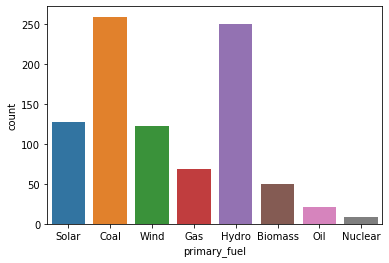

In [54]:
sns.countplot(df['primary_fuel'])   #plotting the count of each value of TARGET Primary Fuel

We notice some imbalance in the data. We will manage this later.

In [55]:
(df.primary_fuel.value_counts()/len(df.index))*100 #checking the proportion of data related to each kind of target value we have in our data.


Coal       28.524229
Hydro      27.533040
Solar      13.986784
Wind       13.546256
Gas         7.599119
Biomass     5.506608
Oil         2.312775
Nuclear     0.991189
Name: primary_fuel, dtype: float64

As you can notice from the above split, it's almost balanced dataset, where 28.52% and 27.53% data have primary fuel Coal and Hydro respectively. But not completely balanced as the others categories such as Oil and Nuclear have the lowest proportion of the respective data.

We can say our data is not that much imbalanced. The balance is fine. Eventhough we will still applay SMOTE.

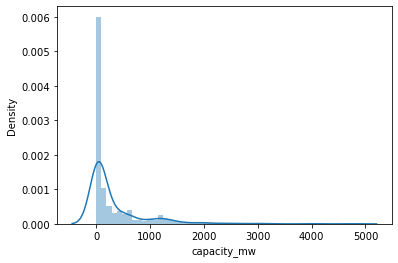

In [56]:
#plotting the continuos variable capacity_mw
sns.distplot(df['capacity_mw'])

Centralized on the value 0

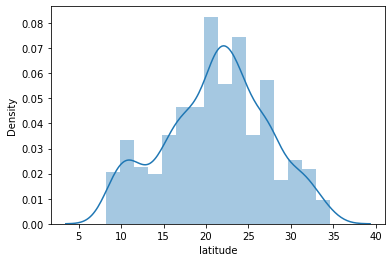

In [57]:
sns.distplot(df['latitude']) #plotting the continuos variable latitude

Centralized between values 10 and 35. The most frequent value is 20.

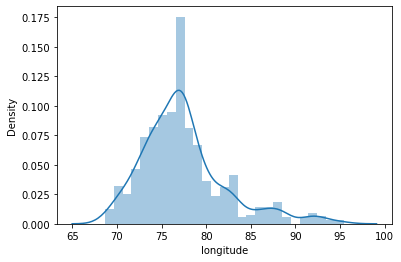

In [58]:
sns.distplot(df['longitude'])  #plotting the continuos variable longitude

The distribution is high etween value 73,5 and 80. The most frequest value is 77.

In [60]:
df.columns #checking columns for myself memory

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

In [61]:
#length of unique values
pd.set_option('display.max_rows', None) #setting maximum rows to print
df_name_uniq_values_counts_total=df.name.value_counts()
len(df_name_uniq_values_counts_total) 

908

In [62]:
len(df.name.value_counts()) 

908

In [63]:
len(df.gppd_idnr.value_counts())

908

In [64]:
len(df.capacity_mw.value_counts())

365

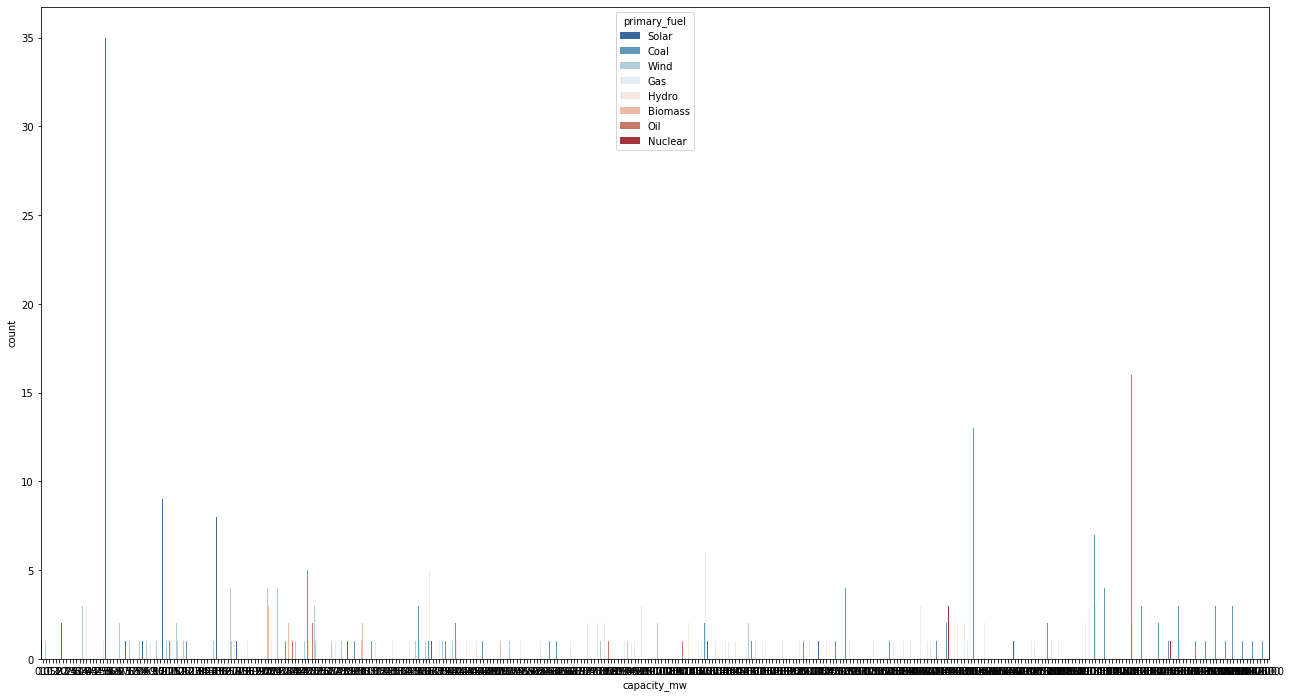

In [65]:

#plotting the capacity_mw by primary fuel

plt.figure(figsize=(22,12))
sns.countplot(x='capacity_mw',hue='primary_fuel',data=df,palette='RdBu_r')

From the previsualization, we can see that Solar has more frequently low generation capacity. And on the other hand, Coal has high capacity of generating electricity.

In [66]:
#groping and couting the primary values by each type of capacity
df.groupby('primary_fuel')['capacity_mw'].value_counts() 

primary_fuel  capacity_mw
Biomass       10.000          6
              16.000          5
              24.000          5
              20.000          3
              26.000          3
              12.500          2
              15.000          2
              18.000          2
              18.900          2
              22.000          2
              28.000          2
              30.000          2
              11.000          1
              11.200          1
              12.960          1
              16.500          1
              17.000          1
              17.500          1
              19.700          1
              19.800          1
              22.800          1
              25.000          1
              25.500          1
              31.500          1
              36.000          1
              50.000          1
Coal          600.000        19
              1200.000       16
              500.000        13
              1000.000        7
              

In [67]:
len(df.commissioning_year.value_counts())

73

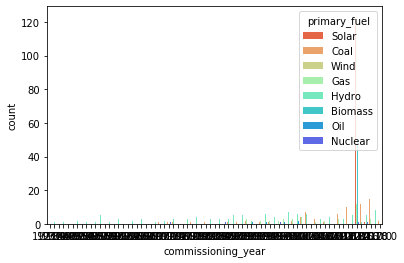

In [68]:
sns.countplot(x='commissioning_year', hue='primary_fuel',data=df,palette='rainbow_r')

In [69]:
df['commissioning_year'] .value_counts()

2013.0    408
2015.0     26
2012.0     23
2016.0     21
2010.0     17
2014.0     17
2000.0     16
2002.0     15
2001.0     15
2017.0     14
2011.0     13
1993.0     13
1996.0     13
1999.0     13
1995.0     13
1992.0     11
2007.0     10
2006.0     10
2009.0     10
1991.0     10
1994.0     10
2003.0     10
1998.0     10
2004.0     10
2005.0     10
1984.0     10
2008.0      9
1987.0      8
1990.0      8
1988.0      8
1997.0      8
1980.0      6
1989.0      6
1979.0      6
1986.0      6
1970.0      5
1957.0      5
1978.0      5
1976.0      5
1981.0      4
1966.0      4
1983.0      4
1973.0      4
1975.0      4
1985.0      4
1960.0      3
1961.0      3
1962.0      3
1963.0      3
1977.0      3
2018.0      3
1968.0      3
1967.0      2
1982.0      2
1952.0      2
1972.0      2
1964.0      2
1965.0      2
1955.0      2
1971.0      2
1974.0      2
1943.0      1
1927.0      1
1939.0      1
1969.0      1
1954.0      1
1949.0      1
1958.0      1
1946.0      1
1956.0      1
1937.0      1
1959.0

In [70]:
from pandas import read_csv
from matplotlib import pyplot
#df['commissioning_year']=df['commissioning_year'].astype('str')
#dfr=pd.concat([df['primary_fuel'],df['commissioning_year']],axis=1)
#dfr['primary_fuel'].plot(style='k.')
#pyplot.show()

#plt.rc('font', size=12)
#fig, ax = plt.subplots(figsize=(10, 6))
#sns.countplot(hue='primary_fuel',x='commissioning_year',data=df,palette='viridis')



In [71]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             908 non-null    float64
 4   longitude            908 non-null    float64
 5   primary_fuel         908 non-null    object 
 6   other_fuel1          908 non-null    object 
 7   commissioning_year   908 non-null    float64
 8   owner                908 non-null    object 
 9   source               908 non-null    object 
 10  url                  908 non-null    object 
 11  geolocation_source   908 non-null    object 
 12  generation_gwh_2013  908 non-null    float64
 13  generation_gwh_2014  908 non-null    float64
 14  generation_gwh_2015  908 non-null    float64
 15  generation_gwh_2016  908 non-null    flo

In [73]:
print(df.nunique())

name                   908
gppd_idnr              908
capacity_mw            365
latitude               838
longitude              829
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
dtype: int64


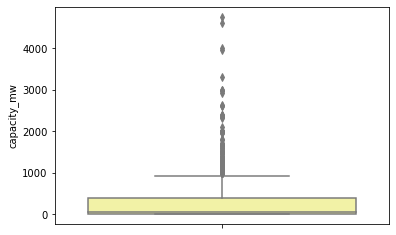

In [74]:
ax = sns.boxplot(y="capacity_mw", hue="other_fuel1",data=df, palette="Accent_r")

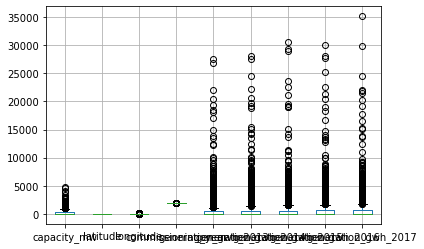

In [75]:
df.boxplot()

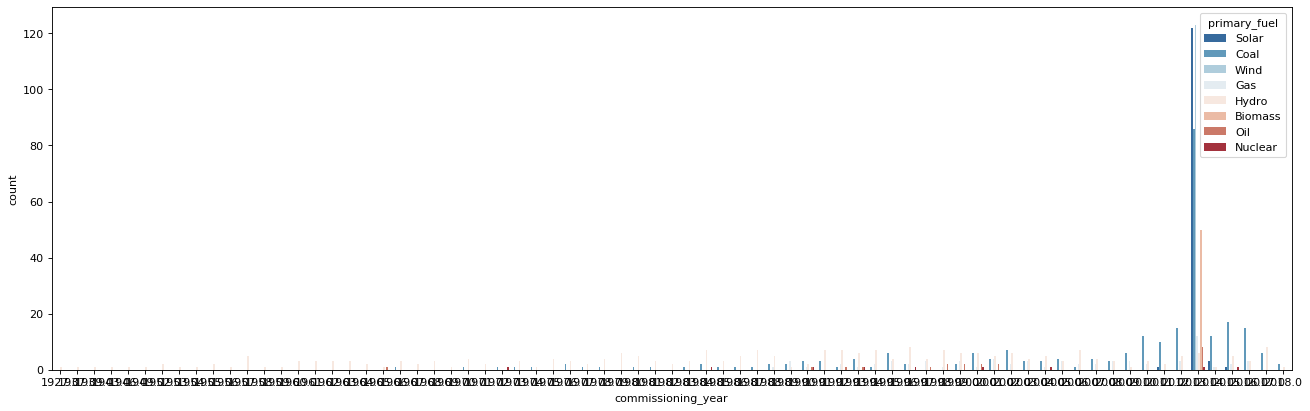

In [76]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.countplot(x='commissioning_year',hue='primary_fuel',data=df,palette='RdBu_r')

capacity_mw                AxesSubplot(0.125,0.71587;0.133621x0.16413)
latitude                AxesSubplot(0.285345,0.71587;0.133621x0.16413)
longitude                AxesSubplot(0.44569,0.71587;0.133621x0.16413)
commissioning_year      AxesSubplot(0.606034,0.71587;0.133621x0.16413)
generation_gwh_2013     AxesSubplot(0.766379,0.71587;0.133621x0.16413)
generation_gwh_2014       AxesSubplot(0.125,0.518913;0.133621x0.16413)
generation_gwh_2015    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
generation_gwh_2016     AxesSubplot(0.44569,0.518913;0.133621x0.16413)
generation_gwh_2017    AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

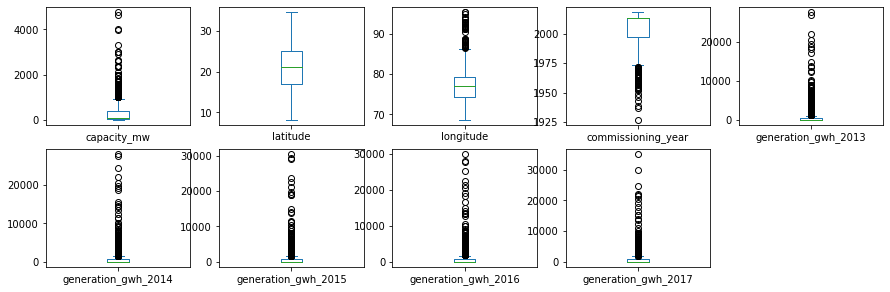

In [77]:
#plotting the boxplot for each column in order to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [78]:
#finding how much type of avacado is sell in different year
com_prim=df.groupby('commissioning_year')['primary_fuel'].value_counts() 
com_prim


commissioning_year  primary_fuel
1927.0              Hydro             1
1937.0              Hydro             1
1939.0              Hydro             1
1943.0              Hydro             1
1946.0              Hydro             1
1949.0              Hydro             1
1952.0              Hydro             2
1953.0              Hydro             1
1954.0              Hydro             1
1955.0              Hydro             2
1956.0              Hydro             1
1957.0              Hydro             5
1958.0              Hydro             1
1959.0              Hydro             1
1960.0              Hydro             3
1961.0              Hydro             3
1962.0              Hydro             3
1963.0              Hydro             3
1964.0              Hydro             2
1965.0              Hydro             1
                    Oil               1
1966.0              Hydro             3
                    Coal              1
1967.0              Hydro             2
1968.0 

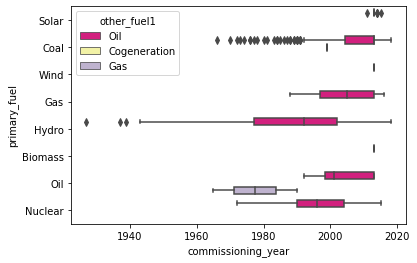

In [79]:
ax = sns.boxplot(x="commissioning_year", y="primary_fuel", hue="other_fuel1",data=df, palette="Accent_r")

We notice that the majority of the fuels are raised after year 1970.  And we notice outliers in Coal and Hydro Fuel.

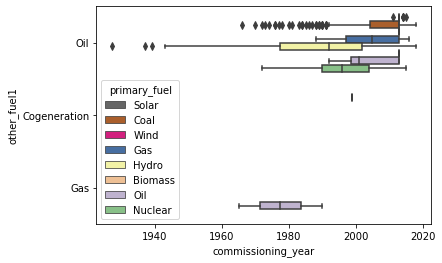

In [80]:
ax = sns.boxplot(x="commissioning_year", y="other_fuel1", hue="primary_fuel",data=df, palette="Accent_r")

We can see that only Oil is related with Gas and nothing else.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             908 non-null    float64
 4   longitude            908 non-null    float64
 5   primary_fuel         908 non-null    object 
 6   other_fuel1          908 non-null    object 
 7   commissioning_year   908 non-null    float64
 8   owner                908 non-null    object 
 9   source               908 non-null    object 
 10  url                  908 non-null    object 
 11  geolocation_source   908 non-null    object 
 12  generation_gwh_2013  908 non-null    float64
 13  generation_gwh_2014  908 non-null    float64
 14  generation_gwh_2015  908 non-null    float64
 15  generation_gwh_2016  908 non-null    flo

In [82]:
!pip install plotly

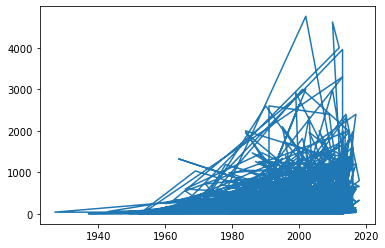

In [83]:
# Using plotly.express


import matplotlib.pyplot as plt
#fig = plt.plot(df, x='commissioning_year', y="capacity_mw")

#df = pd.DataFrame(d)
#df.plot(style=['o','rx'])
x=df.commissioning_year
y=df.capacity_mw

#fig.show()
plt.plot(x, y)

We see the capacity of electricity generating is higher over the years.

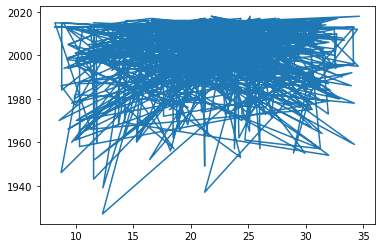

In [84]:
# Using plotly.express


import matplotlib.pyplot as plt
#fig = plt.plot(df, x='commissioning_year', y="capacity_mw")

#df = pd.DataFrame(d)
#df.plot(style=['o','rx'])
y=df.commissioning_year
x=df['latitude']

#fig.show()
plt.plot(x, y)

As we can expect, the latitude is higer over the years. As we can guess, we have more cases, data from recent years than the old ones.

In [85]:
#sns.pairplot(df)

In [86]:
df1 = df.groupby('primary_fuel')['other_fuel1'].value_counts().sort_values(ascending=False)
df1

primary_fuel  other_fuel1 
Coal          Oil             258
Hydro         Oil             250
Solar         Oil             127
Wind          Oil             123
Gas           Oil              69
Biomass       Oil              50
Oil           Oil              19
Nuclear       Oil               9
Oil           Gas               2
Coal          Cogeneration      1
Name: other_fuel1, dtype: int64

As we can see, we have more cases of primary fuel Coal with Oil and then also Hydro with Oil.

In [87]:
df2 = df.groupby('primary_fuel')['geolocation_source'].value_counts().sort_values(ascending=False)
df2

primary_fuel  geolocation_source                  
Coal          WRI                                     259
Hydro         WRI                                     250
Wind          WRI                                     123
Solar         Industry About                          119
Gas           WRI                                      69
Biomass       WRI                                      50
Oil           WRI                                      21
Nuclear       WRI                                       9
Solar         National Renewable Energy Laboratory      4
              WRI                                       4
Name: geolocation_source, dtype: int64

As we can check above, we have high cases of Coal and Hydro being WRI as geolocation_source

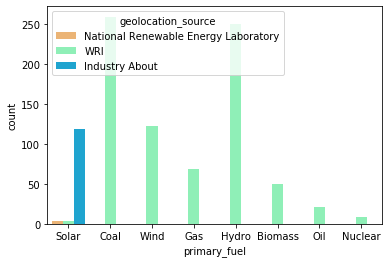

In [88]:
sns.countplot(x='primary_fuel', hue='geolocation_source',data=df,palette='rainbow_r')

As we said earlier, in the above plot we see same case: As we can check above, we have high cases of Coal and Hydro being WRI as geolocation_source

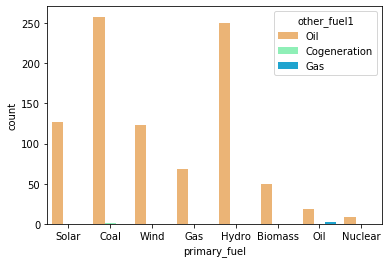

In [89]:
sns.countplot(x='primary_fuel', hue='other_fuel1',data=df,palette='rainbow_r')

As we can see, we have more cases of primary fuel Coal with Oil being fuel1 and then also Hydro with Oil w

In [90]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

In [91]:
#finding how much type of avacado is sell in different year
own_prim=df.groupby('owner')['primary_fuel'].value_counts() 
own_prim

owner                                                        primary_fuel
ACME Cleantech Solutions Private Limited                     Solar             1
ACME Solar Energy                                            Solar             1
AES                                                          Wind              1
AEW Infratech Private Limited                                Solar             1
Abellon CleanEnergy Limited                                  Solar             1
Acc Acc ltd                                                  Hydro           250
                                                             Coal            194
                                                             Gas              59
                                                             Wind             45
                                                             Oil              13
                                                             Nuclear           9
Adani Power Limited                

In [92]:
own_prim.shape 

(286,)

In [93]:
#wanted to plot theprimary fuel by owner, ut we have a huge list of owners. Almost every single row of data has a different owner. So it's not worth do it this way. We won't plot anything with by_owner as the owner list is huge and has different unique names for almost each row.

In [94]:
df.info() #our data's structure: number of rows, columns and chekcing for missing values and the data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             908 non-null    float64
 4   longitude            908 non-null    float64
 5   primary_fuel         908 non-null    object 
 6   other_fuel1          908 non-null    object 
 7   commissioning_year   908 non-null    float64
 8   owner                908 non-null    object 
 9   source               908 non-null    object 
 10  url                  908 non-null    object 
 11  geolocation_source   908 non-null    object 
 12  generation_gwh_2013  908 non-null    float64
 13  generation_gwh_2014  908 non-null    float64
 14  generation_gwh_2015  908 non-null    float64
 15  generation_gwh_2016  908 non-null    flo

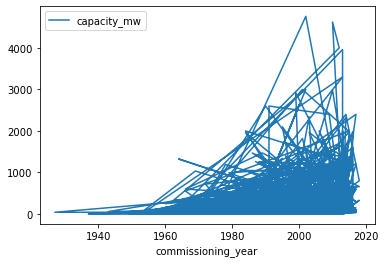

In [95]:
#plotting thecapacity_mw by comminsioning year 
df.plot(x="commissioning_year", y=["capacity_mw"])
plt.show()


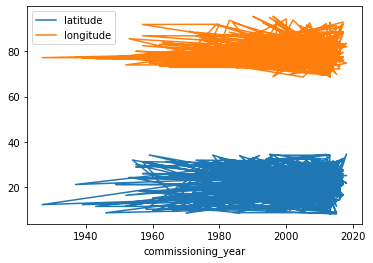

In [96]:
#plotting the latitude and longitude by commissong year.

df.plot(x="commissioning_year", y=["latitude",'longitude'])
plt.show()

<Figure size 2304x864 with 0 Axes>

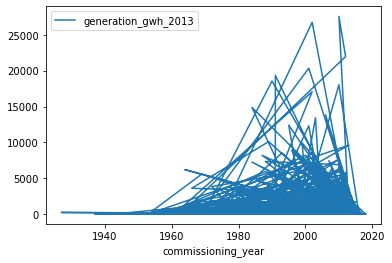

In [97]:
#plotting generating_gwh_2013 by commissioning year
plt.figure(figsize=(32,12))
df.plot(x="commissioning_year", y=["generation_gwh_2013"])
plt.show()

<Figure size 2304x864 with 0 Axes>

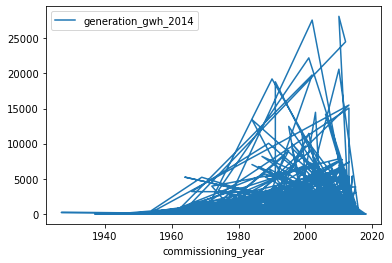

In [98]:
##plotting generating_gwh_2014 by commissioning year

plt.figure(figsize=(32,12))
df.plot(x="commissioning_year", y=["generation_gwh_2014"])
plt.show()

In [99]:
#will check the highest counts of 3 different values of feature generating_gwh_2014 

print(len(df["generation_gwh_2014"].value_counts()))
(df["generation_gwh_2014"].sort_values(ascending=False)).head(3)

374


494    28127.0
881    27594.0
495    24501.0
Name: generation_gwh_2014, dtype: float64

In [100]:
#will check the highest counts of 3 different values of feature generating_gwh_2015
print(len(df["generation_gwh_2015"].value_counts()))
print((df["generation_gwh_2015"].sort_values(ascending=False)).head(3))

398
494    30539.0
696    29342.0
881    29047.0
Name: generation_gwh_2015, dtype: float64


In [101]:
#will check the highest counts of 3 different values of feature generating_gwh_2016

print(len(df["generation_gwh_2016"].value_counts()))
(df["generation_gwh_2016"].sort_values(ascending=False)).head(3)

405


881    30015.0
494    28078.0
696    27671.0
Name: generation_gwh_2016, dtype: float64

In [102]:
#will check the highest counts of 3 different values of feature generating_gwh_2017

print(len(df["generation_gwh_2017"].value_counts()))
(df["generation_gwh_2017"].sort_values(ascending=False)).head(3)

410


881    35116.0
696    29909.0
495    24599.0
Name: generation_gwh_2017, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d22e1e310>,
      dtype=object)

<Figure size 1332x756 with 0 Axes>

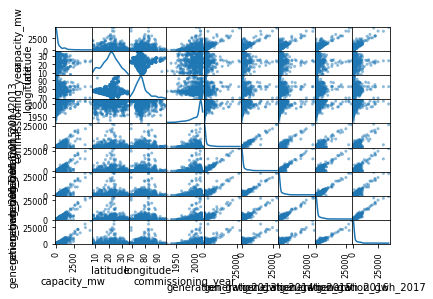

In [103]:
#plotting all features
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
pd.plotting.scatter_matrix(df, diagonal="kde")

In [104]:
#as you can check below, the feature gppd_idnr has unique values that only informs gppd_some kind of unique IDs. So it wont help us with our modeling.
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

In [105]:
len(df['gppd_idnr'].unique()) #908 unique values that arent useful and all 908 values are unique Ids.

908

In [106]:
df=df.drop('gppd_idnr',axis=1) #dropping not useful column

In [107]:
df.info() #checking object type of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   capacity_mw          908 non-null    float64
 2   latitude             908 non-null    float64
 3   longitude            908 non-null    float64
 4   primary_fuel         908 non-null    object 
 5   other_fuel1          908 non-null    object 
 6   commissioning_year   908 non-null    float64
 7   owner                908 non-null    object 
 8   source               908 non-null    object 
 9   url                  908 non-null    object 
 10  geolocation_source   908 non-null    object 
 11  generation_gwh_2013  908 non-null    float64
 12  generation_gwh_2014  908 non-null    float64
 13  generation_gwh_2015  908 non-null    float64
 14  generation_gwh_2016  908 non-null    float64
 15  generation_gwh_2017  908 non-null    flo

Observation: Between 'Capacity_mw_v’ and other attributes indicates the relationship is not linear. We can not see linearity is captured and has useful pattern.

In [108]:
df.shape #shape of our data

(908, 16)

In [109]:
#Now let’s prepare the data for the model. 
#Transform categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
        if df[col].dtype == object:
            df[col] = LabelEncoder().fit_transform(df[col])

In [110]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [111]:
df.corr() #correlation of features of our dataframe

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
name,1.000000,0.059870,-0.133707,0.018649,0.038752,-0.074643,-0.040006,0.098944,-0.013801,0.042711,0.035528,0.075314,0.079470,0.069114,0.062994,0.065140
capacity_mw,0.059870,1.000000,0.049790,0.197124,-0.377783,0.002672,0.012518,-0.310560,-0.241701,-0.243176,0.204698,0.776258,0.827206,0.853262,0.886996,0.902431
latitude,-0.133707,0.049790,1.000000,0.031501,-0.013453,0.036606,0.034896,-0.070855,0.055943,-0.130619,-0.183999,0.061406,0.064046,0.059899,0.053542,0.068184
longitude,0.018649,0.197124,0.031501,1.000000,-0.348710,0.030297,-0.145117,-0.300899,-0.239008,-0.303054,0.252415,0.139016,0.145667,0.160179,0.183428,0.198969
primary_fuel,0.038752,-0.377783,-0.013453,-0.348710,1.000000,0.004902,0.145487,0.284055,0.053609,0.589348,-0.482803,-0.273831,-0.286188,-0.291437,-0.304274,-0.313809
other_fuel1,-0.074643,0.002672,0.036606,0.030297,0.004902,1.000000,0.054789,0.033643,0.026557,0.028118,-0.021383,-0.003067,-0.002986,0.001952,0.006690,0.007839
commissioning_year,-0.040006,0.012518,0.034896,-0.145117,0.145487,0.054789,1.000000,0.381615,0.301660,0.319163,-0.242439,-0.108543,-0.077213,-0.039928,-0.014472,-0.003681
owner,0.098944,-0.310560,-0.070855,-0.300899,0.284055,0.033643,0.381615,1.000000,0.769652,0.419976,-0.384993,-0.222499,-0.226729,-0.225801,-0.234086,-0.240500
source,-0.013801,-0.241701,0.055943,-0.239008,0.053609,0.026557,0.301660,0.769652,1.000000,0.160379,-0.505823,-0.175636,-0.178975,-0.178242,-0.184782,-0.189846
url,0.042711,-0.243176,-0.130619,-0.303054,0.589348,0.028118,0.319163,0.419976,0.160379,1.000000,-0.019150,-0.185962,-0.189497,-0.188722,-0.195646,-0.201007


The majority of the data is positively correlated with each other.

In case of capacity target feature, we see that it is highly correlated with generation_gwh of all years and not too much correlated with others. If we talk about positive correlation with target capacity, we see several features that are highly positively correlated with capacity_mw  all the 
generation_gwh features and the geolocation_source.
If we talk about negative correlation with target capacity, we see several features that are highly negatively correlated with capacity_mw  primary fuel, owner, source and url.

And with regards the categorical target primary fuel, we see it is positively correlated with name, other_fuel1, commissioning_year,source and highly correlated with urls.


sns.pairplot(df)

In [112]:
df.describe() #statistical description of our data

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,321.046378,21.196189,77.447848,3.205947,1.995595,2003.624449,56.113436,43.823789,94.429515,1.733480,974.403892,1068.918194,1129.934756,1181.024405,1235.206195
std,262.26132,580.221767,6.088110,4.781201,2.281339,0.081214,15.238021,82.501086,44.624092,70.352824,0.676835,2716.222621,2924.098882,3103.712012,3129.230619,3185.504866
min,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,16.837500,17.057825,74.390250,1.000000,2.000000,1997.000000,5.000000,22.000000,58.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,453.50000,60.000000,21.278850,76.978950,3.000000,2.000000,2013.000000,5.000000,22.000000,58.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,680.25000,388.125000,25.183775,79.211600,6.000000,2.000000,2013.000000,95.250000,29.250000,115.250000,2.000000,470.116200,570.095213,605.769975,669.808766,708.134037
max,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


#comments describe

OK, we can confirm there is no missing data as we said previously. We can confirm there is no missing data as we said previously since we have 908 total values in all columms.


And first of all, as we can see in the describe table, we should highlight that we have data in different scale, which means we need to standarize the data distribution/scaling.

We can see that we do not have positive skew in any of the features except commissioning_year and geolocation_source.
But we have negative skew in few of the features such as capacity_mw, owner, source and all generation_gwh_.

Seems we have all columns with outliers, except geolocation_source and other_fuel1, but the highlighted ones are all generation_gwh_.



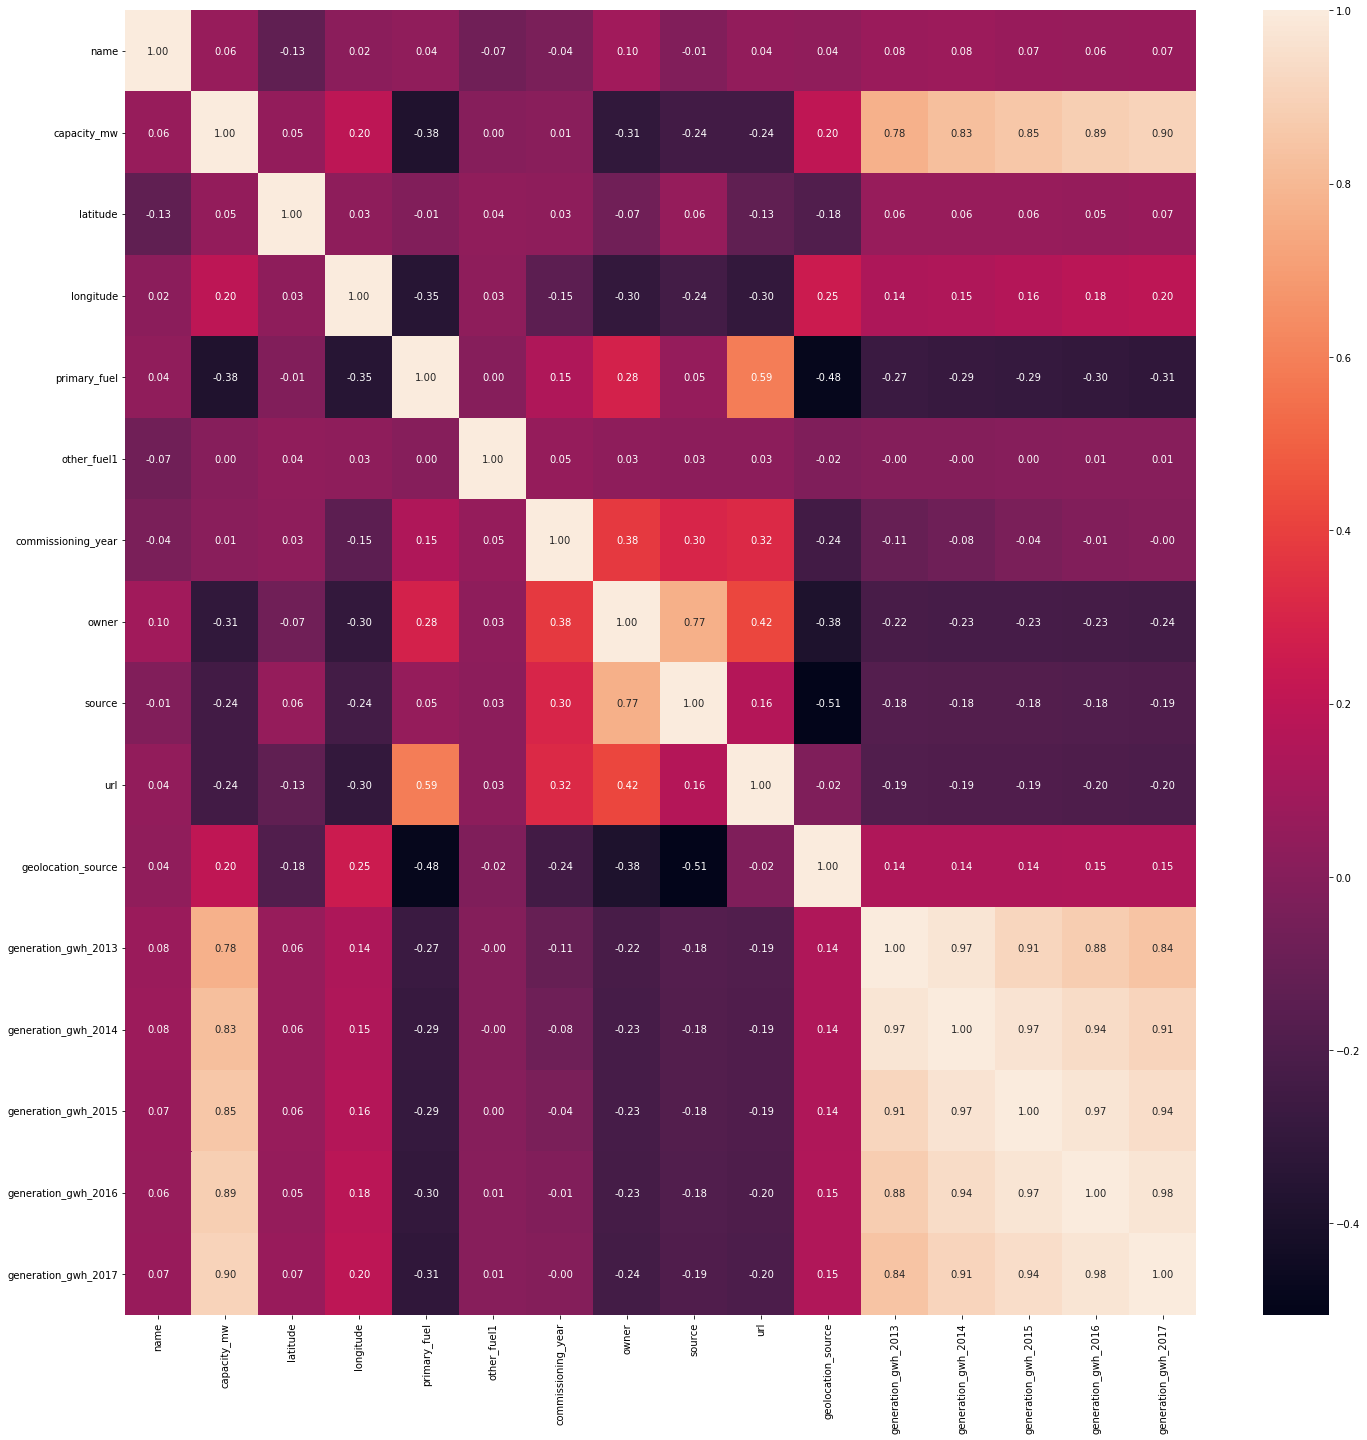

In [113]:
#Get the correlation of the columns
df.corr()
#Visualize the correlation
plt.figure(figsize=(24,24))  
sns.heatmap(df.corr(), annot=True, fmt='.2f')


#comments correlation

In above Heatmap or corelation map tells how the features are linked to the other features. 
The majority of the data is positively correlated with each other.

Here can easily notice that source and owner are correlated with high corrlation of 77%.  Furthermore, from the heatmap, we can easily find that all generation_gwh are highly correlated with each other.

In case of capacity target feature, we see that it is highly correlated with generation_gwh of all years (this can be easily notice the light shades of skin color in above heatmap) and not too much correlated with others. If we talk about positive correlation with target capacity, we see several features that are highly positively correlated with capacity_mw  all the 
generation_gwh features and the geolocation_source.
If we talk about negative correlation with target capacity, we see several features that are highly negatively correlated with capacity_mw  primary fuel, owner, source and url.

And with regards the categorical target primary fuel, we see it is positively correlated with name, other_fuel1, commissioning_year,source and highly correlated with urls. With regards the negative correlation, we have  te geolocation and the all generation_gwh values. These features are negative correlated which means has negative impact on the target. But only positive correlated features have positive correlation with regards the target Primary_Fuel

With regard the target variable Primary Fuel, mostly all the features are correlated negatively with it such as geolocation and the all generation_gwh values. 

With regard the target variable Capacity, mostly all the features are correlated positively with it such asthe all generation_gwh values. 



In [114]:
df.columns 

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [115]:
#Create a new columns at the end of the dataframe that contains the same value in order to have the target in the first column
df['Name_v'] = df['name']
df['Capacity_mw_v'] = df['capacity_mw']
df['Latitude_v'] = df['latitude']
df['Longitude_v'] = df['longitude']
#Remove the original columns
df = df.drop('name', axis = 1)
df = df.drop('capacity_mw', axis = 1)
df = df.drop('latitude', axis = 1)
df = df.drop('longitude', axis = 1)
#Show the dataframe
df.head()  

,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Name_v,Capacity_mw_v,Latitude_v,Longitude_v
0,6,2,2011.0,229,109,128,1,0.000000,0.000000,0.000,0.000000,0.000000,0,2.5,28.1839,73.2407
1,1,2,2013.0,258,174,173,2,0.000000,0.000000,0.000,0.000000,0.000000,1,98.0,24.7663,74.6090
2,7,2,2013.0,2,21,205,2,0.000000,0.000000,0.000,0.000000,0.000000,2,39.2,21.9038,69.3732
3,2,2,2004.0,5,22,58,2,631.777928,617.789264,843.747,886.004428,663.774500,3,135.0,23.8712,91.3602
4,1,2,2015.0,5,22,58,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,4,1800.0,21.9603,82.4091


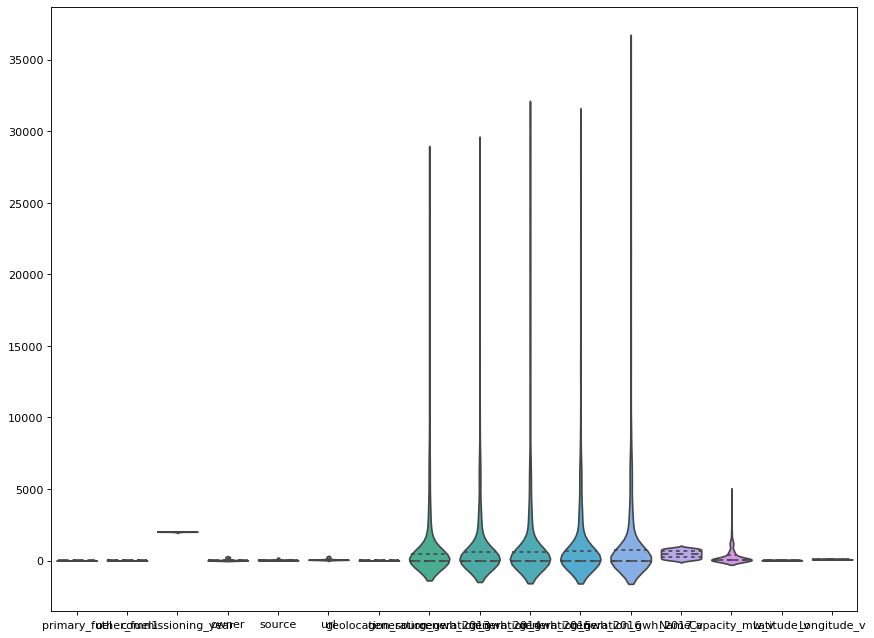

In [116]:
plt.figure(figsize=(13,10), dpi= 80)  #checking values distribution and variance of data of each feature
sns.violinplot( data=df, scale='width', inner='quartile')

In [117]:
#separating numerical and categorical features in order to check
'''Numerical Features and Categorical Features'''
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [118]:
#as we saw the data is a bit skewed, we will check and study skewness of our data
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [119]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
9,generation_gwh_2015,5.255511
7,generation_gwh_2013,5.149528
8,generation_gwh_2014,4.981195
10,generation_gwh_2016,4.979991
11,generation_gwh_2017,4.974829
13,Capacity_mw_v,3.187980
4,source,1.826122
5,url,1.509759
3,owner,1.363820
15,Longitude_v,1.127969


In [120]:
df_skw=df.skew()
df_skw.sort_values

<bound method Series.sort_values of primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year     -1.779021
owner                   1.366078
source                  1.829145
url                     1.512258
geolocation_source     -2.161710
generation_gwh_2013     5.158053
generation_gwh_2014     4.989441
generation_gwh_2015     5.264211
generation_gwh_2016     4.988235
generation_gwh_2017     4.983065
Name_v                  0.000000
Capacity_mw_v           3.193257
Latitude_v             -0.147391
Longitude_v             1.129836
dtype: float64>

In [121]:
#Checking the outliers in order to remove them if possible.
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(908, 16)

In [122]:
threhold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 144, 144, 159,
       159, 180, 184, 192, 210, 210, 210, 210, 210, 210, 222, 240, 245,
       300, 309, 309, 309, 309, 309, 309, 322, 324, 334, 341, 343, 346,
       361, 364, 365, 365, 365, 365, 365, 365, 372, 376, 389, 417, 428,
       445, 455, 479, 483, 485, 494, 494, 494, 494, 494, 494, 495, 495,
       495, 495, 495, 495, 500, 520, 530, 533, 533, 539, 542, 547, 575,
       584, 602, 622, 624, 639, 649, 649, 649, 649, 649, 649, 658, 658,
       658, 658, 658, 658, 662, 670, 690, 696, 696, 696, 696, 696, 707,
       710, 722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727,
       727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789, 808,
       809, 809, 809, 809, 809, 809, 812, 814, 818, 819, 833, 848, 849,
       849, 871, 872, 880, 881, 881, 881, 881, 881, 881, 896, 901]), array([ 9, 10, 11, 13,  4,  4,  7,  8,  9, 10, 11, 13,  7,  8, 15, 15,  4,
        7,  8,  9, 10, 11, 13,  2, 15, 15,  4,  7,  8,  9, 10, 

In [123]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)


(908, 16)
(831, 16)


After removing the outlier’s, the new dataframe will have 831 and 16 columns.

In [125]:
#Percentage of data loss:
loss_perc=(908-831)/908*100
loss_perc #since the loss < 10%, so we can proceed with removing the outliers.

8.480176211453745

In [126]:
#skewness of dataframe after removing outliers
df_new.skew().sort_values(ascending=False) 

generation_gwh_2013    2.859844
generation_gwh_2014    2.737744
generation_gwh_2015    2.561103
generation_gwh_2016    2.506406
generation_gwh_2017    2.418847
Capacity_mw_v          1.962236
source                 1.778820
url                    1.426728
owner                  1.316648
Longitude_v            0.853062
primary_fuel           0.413099
Name_v                 0.027284
other_fuel1            0.000000
Latitude_v            -0.116071
commissioning_year    -1.601241
geolocation_source    -2.098153
dtype: float64

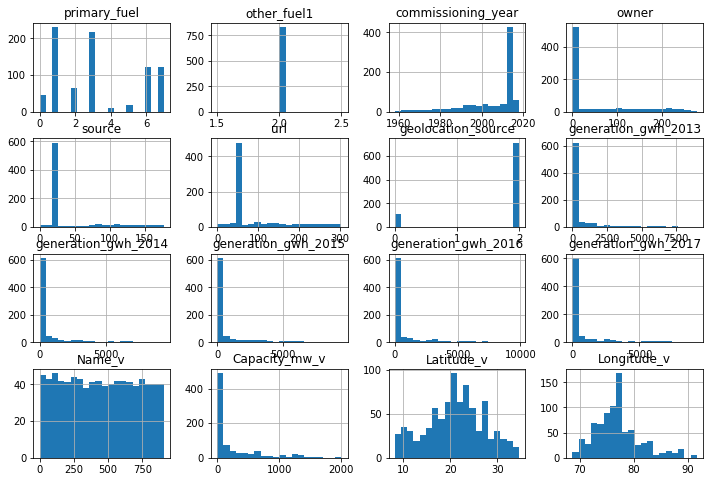

In [127]:
# We see skewness.
#Distributions of the variables/features:
df_new.hist(figsize=(12,8),bins=20)
plt.show()
#As we said, we have a  skewness that we need to get rid of.

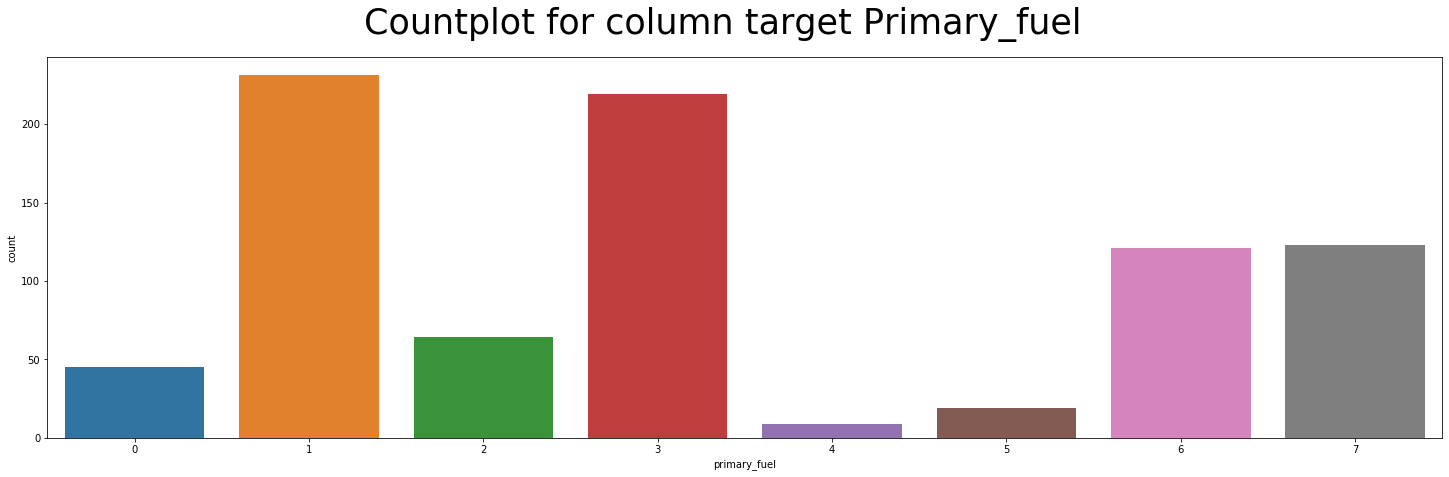

In [128]:
## Countplot for categorical variable Primary_fuel:
fig, (ax1) = plt.subplots(1,1,figsize=(25,7))

fig.suptitle("Countplot for column target Primary_fuel", fontsize=35)

sns.countplot(x="primary_fuel", data=df_new,ax=ax1)

In [129]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Capacity_mw_v','source','url','owner','commissioning_year','geolocation_source')
for col in skew :
    if df_new.skew().loc[col]>0.55:
        df_new[col] = np.log1p(df_new[col])
        
        
 


In [130]:
#skewness of modified dataframe
df_new.skew()

primary_fuel           0.413099
other_fuel1            0.000000
commissioning_year    -1.601241
owner                  0.722390
source                 0.775996
url                   -0.663474
geolocation_source    -2.098153
generation_gwh_2013    0.701459
generation_gwh_2014    0.654065
generation_gwh_2015    0.580605
generation_gwh_2016    0.525895
generation_gwh_2017    0.516650
Name_v                 0.027284
Capacity_mw_v          0.056658
Latitude_v            -0.116071
Longitude_v            0.853062
dtype: float64

Now the skewness value of each column is near to zero. Making the skewness value near to zero will help to get better score. 
Now, we will calculate VIF and check multicolinearity.

In [131]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
 vif = dict()
 vif["FeatureColumns"] = Data.columns
 vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
 return(pd.DataFrame(vif))

In [132]:
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

,FeatureColumns,VIF
1,other_fuel1,38722.763732
10,generation_gwh_2016,27.748705
8,generation_gwh_2014,19.856179
11,generation_gwh_2017,17.481990
9,generation_gwh_2015,16.475957
7,generation_gwh_2013,12.740188
13,Capacity_mw_v,3.801053
3,owner,3.465437
0,primary_fuel,2.959110
4,source,2.887887



As we commented earlier, we have high multicolinearity in our data. Now, let's drop one by one features of our data so that we can reduce the high multicolinearity: first of all,  other_fuel1 that has the highest VIF with value of 38k.

In [133]:
df=df_new.drop(['other_fuel1'],axis=1)

In [134]:
#checking now again the multicolinearity VIF values after having removed the first column with highestmulticolinearity
CalculateVIF(df).sort_values(by='VIF',ascending=False) 


,FeatureColumns,VIF
1,commissioning_year,629.635067
14,Longitude_v,443.338831
4,url,70.151587
3,source,65.765360
9,generation_gwh_2016,46.410365
7,generation_gwh_2014,31.593596
10,generation_gwh_2017,29.523020
8,generation_gwh_2015,27.112732
12,Capacity_mw_v,22.711277
6,generation_gwh_2013,19.052088


In [135]:
df=df.drop(['commissioning_year'],axis=1) #removing the second feature with second highest multicolinearity

In [136]:
CalculateVIF(df).sort_values(by='VIF',ascending=False) #checking for third highest multicolinearity which is Longitude


,FeatureColumns,VIF
13,Longitude_v,94.058135
3,url,68.634957
2,source,59.995614
8,generation_gwh_2016,46.410353
6,generation_gwh_2014,31.592463
9,generation_gwh_2017,29.237924
7,generation_gwh_2015,27.106905
11,Capacity_mw_v,22.014192
5,generation_gwh_2013,19.041812
4,geolocation_source,17.051000


In [137]:
df=df.drop(['Longitude_v'],axis=1) #dropping Longitude as it has very high VIF value

In [138]:
CalculateVIF(df).sort_values(by='VIF',ascending=False) #now checking again the VIF values.

,FeatureColumns,VIF
3,url,65.379745
8,generation_gwh_2016,46.380559
2,source,42.718763
6,generation_gwh_2014,31.583103
9,generation_gwh_2017,29.211679
7,generation_gwh_2015,27.104202
11,Capacity_mw_v,21.310811
5,generation_gwh_2013,19.040379
1,owner,14.462892
4,geolocation_source,14.363929


In [139]:
#stop deleting more variables as it decreases the regressor score.
#since i was informed i should delete max 4 column and continue with model building, i am continuing with model building.

In [140]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df_new.shape[1]].values 
Y = df.iloc[:, 0].values
X.shape
Y.shape #primary fuel
Y

array([6, 1, 7, 2, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 2, 1, 1, 0, 0, 0, 2,
       1, 1, 6, 6, 7, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 1, 0, 3, 3, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3,
       3, 7, 7, 1, 0, 5, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1,
       3, 3, 3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 7, 5, 2, 1, 3, 5, 1, 6,
       6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 1,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 0, 6, 6, 7, 6,
       1, 2, 4, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 1, 1, 3, 2, 2, 5, 3, 3, 0,
       5, 3, 3, 0, 3, 1, 1, 1, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 3, 3, 7, 2,
       7, 7, 7, 7, 2, 7, 2, 7, 2, 3, 2, 2, 3, 1, 3, 2, 1, 7, 3, 3, 3, 1,
       1, 3, 7, 1, 1, 2, 1, 1, 2, 1, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 7, 7, 7, 7, 7, 1, 7, 6, 1, 2, 3, 3,
       1, 7, 1, 1, 3, 1, 1, 7, 6, 6, 3, 0, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3,
       1, 6, 7, 7, 7, 7, 7, 3, 3, 3, 4, 1, 3, 4, 3,

In [141]:
X.shape

(831, 12)

In [142]:
Y.shape #primary fuel

(831,)

In [143]:
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
Xrr = df.iloc[:, 1:df_new.shape[1]].columns  #getting columns names of X variables.

In [144]:
Xrr = df.iloc[:, 1:df_new.shape[1]].columns #getting columns names of X variables.

In [145]:
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=Xrr)

In [146]:
df.shape #rechecking the df shape format

(831, 13)

In [147]:
df.dtypes 

primary_fuel             int64
owner                  float64
source                 float64
url                    float64
geolocation_source       int64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
Name_v                   int64
Capacity_mw_v          float64
Latitude_v             float64
dtype: object

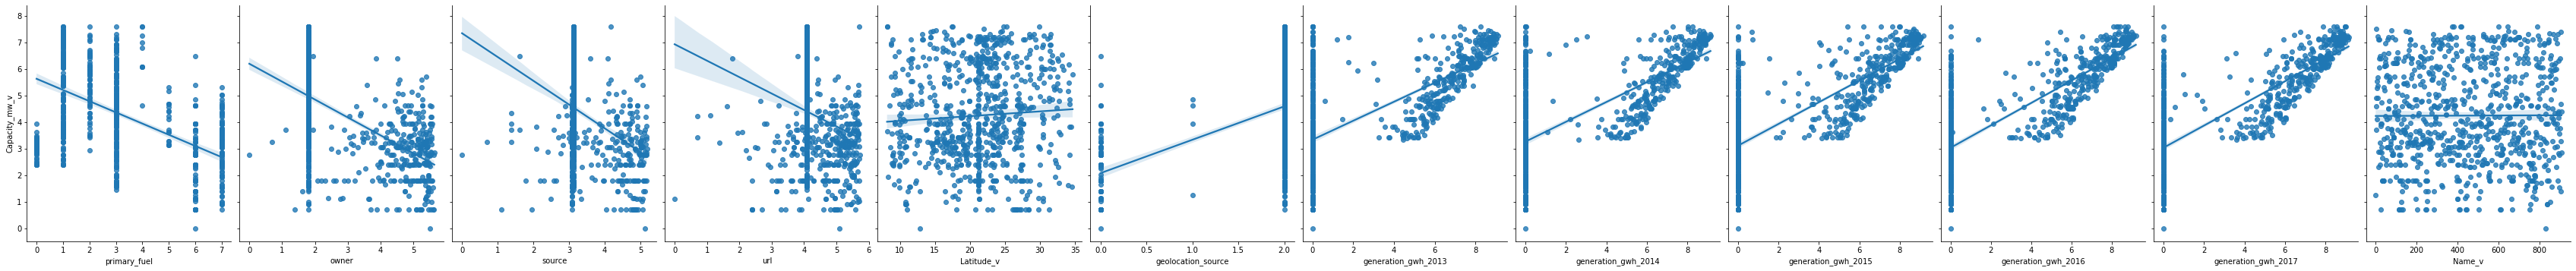

In [148]:
#chekcing regression relation line on few columns in relation with Capacity_mw target.
sns.pairplot(df, x_vars=['primary_fuel','owner','source','url','Latitude_v','geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017','Name_v'], y_vars=["Capacity_mw_v"],
             height=5, aspect=.8, kind="reg");

In [149]:
df.columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'Name_v', 'Capacity_mw_v',
       'Latitude_v'],
      dtype='object')

In [150]:
#doing the same process with data in order to have the Capacity_mw_v as target and train the linear regression algorithm:
X=df.iloc[:,0:14]
X=X.drop('Capacity_mw_v',axis=1)
y=df['Capacity_mw_v']
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
Xrr = df.iloc[:, 1:df_new.shape[1]].columns
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
X = pd.DataFrame(x,columns=Xrr)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 67.30322390338021
MAE: 0.8456512212828637
MSE: 1.0703368937670723
RMSE: 1.034570874211657


The RMSE is okay so we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions.

Text(0, 0.5, 'Predicted Y')

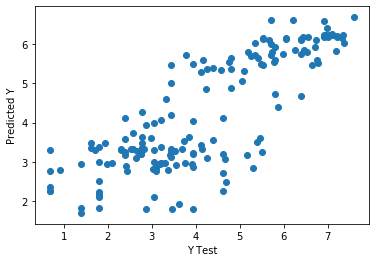

In [151]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

As our errors like RMSE are still a bit high, so we have such dispersion in our previous plot let's check another model!

Text(0, 0.5, 'Predicted Y')

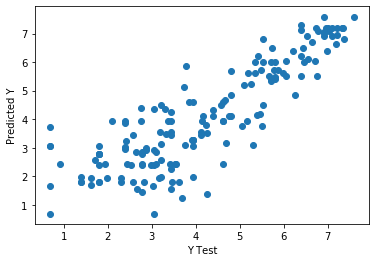

In [152]:

#let's try DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')



Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check some metrics like RMSE

In [153]:
#printing the error metrics:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 72.3617996341543
MAE: 0.7084475351284447
MSE: 0.9047431906275761
RMSE: 0.9511798939357246


Very Nice, we have higher accuracy and our RMSE is lower than the previous one we got with Linear Regression. Now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor



In [154]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 81.62740888877816
MAE: 0.5640775317061637
MSE: 0.6014312249723812
RMSE: 0.7755199707115099


Well, great! we have just improved our results and we we have now R2 accuracy of 81,62%. as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

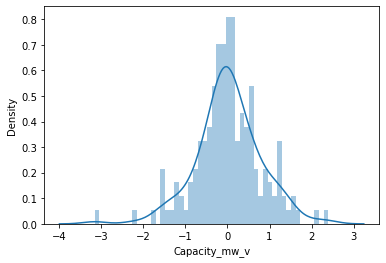

In [155]:
#residuals
sns.distplot((y_test-pred),bins=50)

Our residuals are normally distributed and that's really a good sign of our model!

,Y_Test,Pred
660,2.862201,2.428531
893,2.833213,2.234852
303,3.421000,3.664469
604,1.791759,2.183901
173,6.398595,6.460433


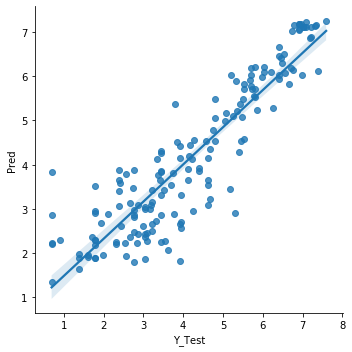

In [156]:
#Lets see final Actual Vs Predicted sample.

data = pd.DataFrame({'Y_Test':y_test , 'Pred':pred},columns=['Y_Test','Pred'])
sns.lmplot(x='Y_Test',y='Pred',data=data,palette='rainbow')
data.head()

All seems fine! But, let's try and see if we can find a a better model!

In [157]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set and let's see if we get an improvement on our modeling score:

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(50,89):
    train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
#Above I am using the for loop which help me to provide the R2 score at each random state and for the best state where R2 score is maximum is come as output value.

R2 score correspond to random state  50 is 0.6433842198341508
R2 score correspond to random state  50 is 0.6153291319214742
R2 score correspond to random state  50 is 0.722901947837983
R2 score correspond to random state  50 is 0.6008371659348433
R2 score correspond to random state  50 is 0.7450515383401717
R2 score correspond to random state  51 is 0.6690553395651966
R2 score correspond to random state  51 is 0.6459636885274714
R2 score correspond to random state  51 is 0.7432839147080137
R2 score correspond to random state  51 is 0.6413896823811759
R2 score correspond to random state  51 is 0.7523432727239999
R2 score correspond to random state  52 is 0.6425228321741898
R2 score correspond to random state  52 is 0.6356333518357145
R2 score correspond to random state  52 is 0.7460938564786042
R2 score correspond to random state  52 is 0.6277133417545437
R2 score correspond to random state  52 is 0.770572195548904
R2 score correspond to random state  53 is 0.6152524962374222
R2 score c

In [421]:
#checking the R2_score given the best paramters

GBR = GradientBoostingRegressor(random_state = 80)
GBR.fit(train_x,train_y)
pred = GBR.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)
gbscore=cross_val_score(GBR,x,Y,cv=4)
gbrc=gbscore.mean()
print('Cross_Val_Score: ', gbrc*100)

R2 Score : 79.45327239253052
Cross_Val_Score:  99.99999992625762


In [412]:
#checking the errors metrics
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

MAE: 0.5968279088189845
MSE: 0.6361230415492856
Root Mean Absolute Error:  0.7725463797203276
RMSE: 0.7975732201806212


In [160]:

#Checking the best parameter for prediction of KNeighborsRegressor AlgoRITHM using GridSearchCV with the parameters given that random state is 88. Let's tune and try to get best parameters when random state is 88:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = 88,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,6), 'p': (1,3), 'weights':('uniform','distance')}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [161]:
#checking the R2_score having  {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
KNN = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30,metric='minkowski' , metric_params=None, n_jobs=None,  p=1)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 70.35632898675426


In [162]:
#error results having {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

MAE: 0.7010976038381705
MSE: 0.9173196273987506
RMSE: 0.9577680446740487


In [163]:
#checking the R2_scor having the best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
KNN = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30,metric='minkowski' , metric_params=None, n_jobs=None,  p=1)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 72.17814046913908


In [164]:
#checking the mean errors after trained the model  with parameters {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

Mean Absolute Error:  0.6871479128113469
Mean squared Error:  0.8609439028987287
Root Mean Absolute Error:  0.8289438538353167
RMSE: 0.9278706283198799


,Y_Test,Pred
96,4.605170,3.976922
164,3.258097,3.192210
641,2.602690,3.050313
820,3.367296,3.122633
418,7.591357,6.838140


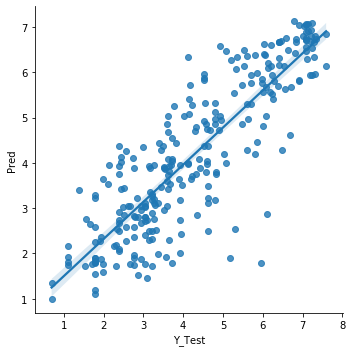

In [165]:
#let's plot it:
data = pd.DataFrame({'Y_Test':test_y , 'Pred':pred},columns=['Y_Test','Pred'])
sns.lmplot(x='Y_Test',y='Pred',data=data,palette='rainbow')
data.head()

Till now, if we check all the accuracy scores and also the errors metrics till now, we will see the model is GBR with R2 Score of  79.45% and RMSE of 0.7975, the best one in all our analisis. So, our final model for Capacity prediction is GBR. Therefore, we will save this GBR model as our Capacity Prediction!



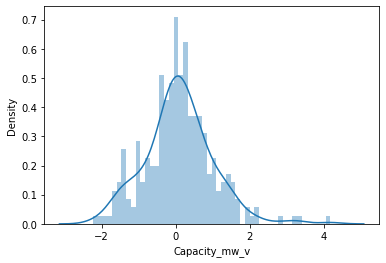

In [166]:
#plotting the residuals:
sns.distplot((test_y-pred),bins=50)
#Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.


Residuals are normalized, which means our model should work fine for prediction!

The KNN accuracy is high till now and RMSE is the lowest as of now. So we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions

In [168]:
#Lets try with the DecisionTree Regressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 69.39362130982198


Text(0, 0.5, 'Predicted Y')

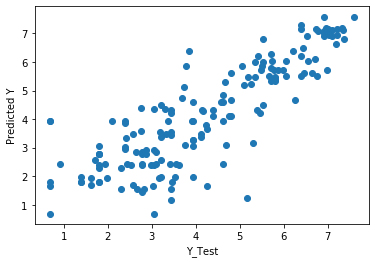

In [169]:
#plotting the scatter plot for predicted Y and Ytest
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted Y')

In [170]:
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 69.39362130982198
MAE: 0.721134363498999
MSE: 1.0019072277921164
RMSE: 1.000953159639409


As we can see that we don't have a straight line as we have high dispersion in the data. So this is not the best model we can apply on our data. So we will still keep the previous model GBR model.

We see GBR still has the lower RMSE. Ok, now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor:

In [171]:
#trying  with RandomForestRegressor:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(train_x,train_y)
pred=rdr.predict(test_x)

In [172]:
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

R2 Score : 69.39362130982198
MAE: 0.563037285086757
MSE: 0.5655196648417931
RMSE: 0.7520104153811921


OK! As we can see the RMSE of all these algorithms is higher than the the GradientBoostingRegressor model and R2 Score is less than GradientBoostingRegressor model , including the RandomForest Regressor that hasn't not improved our best model GradientBoostingRegressor results in this case.

So, finally, our final decision is to go for the GBR = GradientBoostingRegressor(random_state = 80) model as it has best accuracy, R2_score and the lowest errors compared to others model.

Final Decision for model selection: GradientBoostingRegressor(GBR) model for capacity_mw prediction !

In [173]:
#Now we will look for a classification algorithm that works best in classifying the Primary Fuel. For that we will use several classifiers at the same time and check which one works the best!

#importing library for classification algorithms, prediction and matrices:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [174]:
df.shape

(831, 13)

In [175]:
#assign the value of x and y for training and testing phase
x_c = df.drop(columns=['primary_fuel'])
y_c = df[["primary_fuel"]]
print(x_c.shape)
print(y_c.shape)

(831, 12)
(831, 1)


In [176]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [177]:
#Splitting the X and Y data in training and testing data:
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 62,test_size = 0.33)

In [178]:
#Now by using multiple Algorithms we are checking for the best algorithm which suits best for our data set in order to classify the Primary Fuel:

model = [DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),MultinomialNB(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier()]
max_accuracy_score = 0
for r_state in range(59,67):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  59 is 0.7454545454545455
accuracy score correspond to random state  59 is 0.4581818181818182
accuracy score correspond to random state  59 is 0.56
accuracy score correspond to random state  59 is 0.3709090909090909
accuracy score correspond to random state  59 is 0.2581818181818182
accuracy score correspond to random state  59 is 0.4763636363636364
accuracy score correspond to random state  59 is 0.8218181818181818
accuracy score correspond to random state  60 is 0.7890909090909091
accuracy score correspond to random state  60 is 0.4509090909090909
accuracy score correspond to random state  60 is 0.5054545454545455
accuracy score correspond to random state  60 is 0.4
accuracy score correspond to random state  60 is 0.26545454545454544
accuracy score correspond to random state  60 is 0.6581818181818182
accuracy score correspond to random state  60 is 0.850909090909091
accuracy score correspond to random state  61 is 0.7672727272727272
accuracy 

In [179]:
#checking score of GBC with none random state None
GBC_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

GBC_model.fit(train_xc,train_yc)
predc = GBC_model.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
GBC_model.score(test_xc, test_yc) #best_one_for_modeling and training

Accuracy Score : 80.0


0.8

In [180]:
#checking score of GBC with random state 62
GBC_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=62, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

scores = cross_val_score(clf, train_xc, train_yc, cv=5)
scores=scores.mean()



GBC_model.fit(train_xc,train_yc)
predc = GBC_model.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
scores = cross_val_score(GBC_model, train_xc, train_yc, cv=5)
scores=scores.mean()
print("Accuracy Score :",acu_score*100)
GBC_model.score(test_xc, test_yc) #best_one_for_modeling and training

Accuracy Score : 80.36363636363636


0.8036363636363636

In [181]:
accuracy = accuracy_score(test_yc,predc)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 80.36%


In [182]:

#Let's try once again with AdaboostClassifier just to double check if previously we got the best accuracy with regrds classifier GBC_model:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=100)
clf.fit(train_xc,train_yc)
scores = cross_val_score(clf, train_xc, train_yc, cv=5)
scores=scores.mean()
print("Accuracy Score :",scores*100)
clf.score(test_xc, test_yc)

Accuracy Score : 52.170205920205916


0.4290909090909091

In [183]:
#checking score of GBC
clf = GradientBoostingClassifier(criterion='friedman_mse',loss='deviance',n_estimators=100, learning_rate=0.1,
     max_depth=3, random_state=0).fit(train_xc, train_yc)
sc=clf.score(test_xc, test_yc)
print("Accuracy Score :",sc*100)
scores_acc = cross_val_score(clf, train_xc, train_yc, cv=5)
print("Scores: ",scores_acc*100)
scores=scores.mean()
print("Accuracy Mean Score :",scores*100)

Accuracy Score : 80.0
Scores:  [80.35714286 78.37837838 80.18018018 86.48648649 81.98198198]
Accuracy Mean Score : 52.170205920205916


In [184]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30), 'weights': ('uniform', 'distance') }
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_
gridsearch.score(test_xc, test_yc)

0.48

KNC gives us the worst score!

So far, the best accuracy for cassification is 80.36%

Conclusion

Final model: Through the use of many different classification models, and tuning the best performing, my final model which is GBC, through which we have obtained an accuracy of 80.36%.

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way.

For further Evaluation, let's print confusion matrix:

In [185]:

#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(GBC_model, train_xc, train_yc, cv=3)
confusion_matrix(train_yc, predictions)

array([[ 20,  11,   0,   0,   0,   0,   0,   0],
       [ 10, 120,   6,  18,   2,   0,   1,   0],
       [  1,  18,   6,  16,   0,   1,   0,   0],
       [  0,  10,   2, 143,   0,   1,   0,   0],
       [  0,   3,   1,   0,   1,   0,   0,   0],
       [  1,   2,   1,   4,   0,   3,   0,   1],
       [  0,   0,   0,   0,   0,   0,  75,   0],
       [  0,   0,   0,   0,   0,   0,   0,  78]])

In [186]:

#Lt's calculate Precision and Recall:

print("Precision Score : ",precision_score(train_yc, predictions, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(train_yc, predictions, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.802158273381295
Recall Score :  0.802158273381295


Our model predicts 80.21% of the time the right Primary Fuel. The recall tells us that it predicted that primary fuel 80,21 % of the instances of cases where the primary fuel is actually the predicted primary fuel.

F-Score You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [187]:
#F1 Score:

from sklearn.metrics import f1_score
f1_score(train_yc, predictions,average='micro' )

0.8021582733812951

In [188]:
#Let's try again working with Regression models if we can improve any results:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 67.30322390338021
MAE: 0.8456512212828637
MSE: 1.0703368937670723
RMSE: 1.034570874211657


In [189]:
#counting unique values of y_train
unique, counts = np.unique(y_train, return_counts=True)
Y_train_dc=dict(zip(unique, counts))


In [190]:
#Y_train_dc.items()

In [191]:
list_of_dict_values = list(Y_train_dc.values())

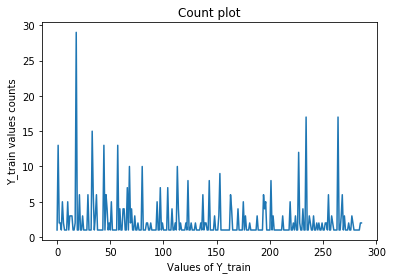

In [192]:
#let's plot and ckeck the counts/variability of values  of our Y_train: 
import matplotlib.pyplot as plt
plt.plot(list_of_dict_values)
plt.title('Count plot')
plt.xlabel('Values of Y_train')
plt.ylabel('Y_train values counts')
plt.show()

In [193]:
#plotting all columns against all columns
#g = sns.PairGrid(df)
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)

In [ ]:
#checking multivariate analysis: in this case, one variable vs other variable:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#cData_attr = df.iloc[:, 0:14]
#sns.pairplot(cData_attr, diag_kind='kde')

In [195]:
## Implementing Linear Regression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
regressor.fit(X_train,y_train)

LinearRegression(normalize=False)

In [196]:
y_train.shape

(664,)

In [197]:
X_train.shape

(664, 12)

In [198]:
#doing thw same transformation as explaines previously
X=df.iloc[:,0:14]
X=X.drop('Capacity_mw_v',axis=1)
y=df['Capacity_mw_v']
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
Xrr = X.columns
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
X = pd.DataFrame(x,columns=Xrr)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 67.30322390338021
MAE: 0.8456512212828637
MSE: 1.0703368937670723
RMSE: 1.034570874211657


In [199]:
X.columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'Name_v', 'Latitude_v'],
      dtype='object')

In [200]:
#prediction
y_predict=regressor.predict(X_test)

In [201]:
#score
regressor.score(X_train,y_train)

0.6647612634182987

In [202]:
#score
regressor.score(X_test,y_test)

0.6730322390338022

In [203]:
## Seeing the Predictions
y_predict

array([1.79235562, 3.32547477, 3.17796486, 2.11052418, 6.10623895,
       3.32105922, 3.56347826, 3.12030083, 6.15848952, 4.60150445,
       3.33440832, 3.6141152 , 2.96522176, 2.95272044, 3.10201507,
       2.34616683, 5.06992438, 2.10061109, 6.18951961, 5.32040763,
       5.37093809, 6.16094866, 3.49095658, 4.7342705 , 2.78819692,
       5.85012004, 2.26077479, 1.79272036, 3.25701857, 3.72834151,
       2.93330439, 6.10719973, 3.57243179, 5.48671167, 6.17344032,
       5.91407701, 3.59735356, 5.74260017, 3.00083693, 5.73295081,
       3.29181141, 3.05878009, 3.62708786, 2.95388893, 6.22151156,
       5.60594997, 5.48664353, 1.78966006, 3.43818804, 3.08669551,
       2.48551876, 5.54103202, 3.19292731, 5.58533453, 3.30995348,
       3.47740663, 4.86318152, 6.21719515, 6.24469457, 4.26007537,
       1.6846671 , 2.25776214, 2.77508383, 4.66769785, 6.11910661,
       5.65033874, 4.87093117, 2.94834387, 3.20327796, 6.23636738,
       3.49260325, 6.61440403, 4.03313242, 4.06376753, 3.62582

In [204]:
#coefficients
regressor.coef_

array([-0.41916574, -0.12246418, -0.0848438 ,  0.17532448,  0.19796804,
       -0.28508021,  0.02736234,  0.34808282,  0.59327472,  0.41040033,
       -0.0060594 ,  0.05378102])

In [205]:
#importing the metric r2_score and find the score of the implemented regression
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_predict)

0.6730322390338022

In [206]:
#The R² value for the test data = 0.6730322390338022, which is different to the train data.


In [207]:
#Since the R² values for both the train and test data are not equal, the model we built is not the best-fitted model.


In [208]:
#Building a better Linear Regression Machine Learning Model:
rand_st=[]
train_acc=[]
test_acc=[]
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,50):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    rand_st.append(i)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    train_acc.append(r2_score(Y_train,pred_train))
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    test_acc.append(r2_score(Y_test,pred_test))


At random state 0, the training accuracy is:  0.9852753474149772
At random state 0, the testing accuracy is:  0.9825979859240519
At random state 1, the training accuracy is:  0.9858845314098501
At random state 1, the testing accuracy is:  0.9808763665323443
At random state 2, the training accuracy is:  0.9848880963033159
At random state 2, the testing accuracy is:  0.9836821931155959
At random state 3, the training accuracy is:  0.9855906491622333
At random state 3, the testing accuracy is:  0.9820413585982547
At random state 4, the training accuracy is:  0.9844521836680024
At random state 4, the testing accuracy is:  0.9843135794120099
At random state 5, the training accuracy is:  0.9843901017189279
At random state 5, the testing accuracy is:  0.9848767606699929
At random state 6, the training accuracy is:  0.983426301915513
At random state 6, the testing accuracy is:  0.986071199613316
At random state 7, the training accuracy is:  0.9844954731191795
At random state 7, the testing acc

In [209]:
#we will create a dataframe that will help us to find and get the lowest differnce between train accuracy and testing accuracy:

import pandas as pd
df_tr=pd.DataFrame({})
df_tr['rand_st']=rand_st
df_tr['train_acc']=train_acc
df_tr['test_acc']=test_acc
df_tr['train_acc-test_acc']=(df_tr['train_acc']-df_tr['test_acc'])/df_tr['train_acc']
df_tr['train_acc-test_acc'].min()


-0.0041255890058843865

In [210]:
min(df_tr['train_acc-test_acc'])

-0.0041255890058843865

In [211]:
df_tr

,rand_st,train_acc,test_acc,train_acc-test_acc
0,0,0.985275,0.982598,0.002717
1,1,0.985885,0.980876,0.005080
2,2,0.984888,0.983682,0.001224
3,3,0.985591,0.982041,0.003601
4,4,0.984452,0.984314,0.000141
5,5,0.984390,0.984877,-0.000494
6,6,0.983426,0.986071,-0.002689
7,7,0.984495,0.984540,-0.000046
8,8,0.984922,0.983699,0.001241
9,9,0.984651,0.983897,0.000767


In [212]:

#let's take radom state of 38 as it has the lowest difference in the above table:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=38)
lr.fit(X_train,Y_train)

LinearRegression()

In [213]:
#r2_score
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.985730341180466


In [214]:
#Cross validation of the model:
j_ap=[]
cv_scores=[]
cv_means=[]
Train_accuracy_s=[]
Test_accuracy_s=[]
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,15):
    j_ap.append(j)
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_scores.append(cv_score)
    cv_mean=cv_score.mean()
    cv_means.append(cv_mean)
    Train_accuracy_s.append(Train_accuracy)
    Test_accuracy_s.append(Test_accuracy)
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is 0.9822198568114464 and accuracy score for training is -1.0793434613278827 and accuracy for the testing is 0.985730341180466


At cross fold 3 the CV score is 0.9830114942267993 and accuracy score for training is -1.0793434613278827 and accuracy for the testing is 0.985730341180466


At cross fold 4 the CV score is 0.9835056764782941 and accuracy score for training is -1.0793434613278827 and accuracy for the testing is 0.985730341180466


At cross fold 5 the CV score is 0.9835477966116886 and accuracy score for training is -1.0793434613278827 and accuracy for the testing is 0.985730341180466


At cross fold 6 the CV score is 0.9826890596638161 and accuracy score for training is -1.0793434613278827 and accuracy for the testing is 0.985730341180466


At cross fold 7 the CV score is 0.9831978216912923 and accuracy score for training is -1.0793434613278827 and accuracy for the testing is 0.985730341180466


At cross fold 8 the CV score is 0.9831784345165526 a

In [215]:
#Creating dataframe in order to get the minimum differnece between training accuracy and testing accuracy:
import pandas as pd
df_tr_cv=pd.DataFrame({})
df_tr_cv['CFold num']=j_ap
df_tr_cv['CV Score mean']=cv_means
df_tr_cv['Acc Score Train']=Train_accuracy_s
df_tr_cv['Acc Score Test']=Test_accuracy_s
df_tr_cv['train_acc-test_acc']=(df_tr_cv['CV Score mean']+df_tr_cv['Acc Score Train'])/df_tr_cv['Acc Score Train']



In [216]:
df_tr_cv.min()

CFold num             2.000000
CV Score mean         0.981053
Acc Score Train      -1.079343
Acc Score Test        0.985730
train_acc-test_acc    0.088754
dtype: float64

In [217]:
#Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [218]:
#using Lasso we will tune the parameters.
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [219]:
#best cross fold is 2 as we checked in dataframe df_tr_cv
cv_score=cross_val_score(clf,x,Y,cv=2)
cv_score


array([0.98205002, 0.98283047])

In [220]:
#score after have implmenented Cv
cv_mean=cv_score.mean()
cv_mean

0.9824402415025506

In [221]:
#training with Lasso
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss  

0.9853150386968555

In [222]:
# grid search hyperparameters for the Lasso algorithm
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X_train, Y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)  

MAE: -0.23411
Config: {'alpha': 0.0}


In [223]:
results.best_params_


{'alpha': 0.0}

In [224]:
#lets calculate the score of the regularization Lasso:
ls=Lasso(alpha=0.0,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss 

0.9857303411804659

In [225]:
# grid search hyperparameters for the elastic net
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet


# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['random_state'] = list(range(0,10))
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MAE:', results.best_score_)
print('Config:', results.best_params_) 

MAE: -0.2341092605461075
Config: {'alpha': 0.0, 'random_state': 0}


In [226]:
#lets calculate the score of the regularization Lasso:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.9857273125542237

In [227]:
#score of the training Lasso algorithm
ls.score(X_train,Y_train)

0.9839123195156506

In [228]:
#score of the testing Lasso algorithm
ls.score(X_test,Y_test)  

0.9857273125542237

In [229]:
#till now best cross fold is 2
cv_score=cross_val_score(ls,X_train,Y_train,cv=8)
cv_mean=cv_score.mean()
cv_mean 

0.9829379335251263

In [230]:
#Llet's try Ensemble Technique:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [231]:
#Let's try RandomForestRegressor
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test)) #this is the BEST R2 SCORE i could get in this case study. So RFR is our final selected model

R2 score: 99.60409205222918
Cross Val Score: 99.21211650024719
0.9960409205222918


In [232]:
#RandomForestRegressor Training Score
rf.score(X_train,Y_train)   #this is the BEST TRAINING SCORE i could get in this case study. So RFR is our final selected model

0.9991976606819476

In [233]:
#RandomForestRegressor Testing Score
rf.score(X_test,Y_test)   #this is the BEST TESTING SCORE i could get in this case study. So RFR is our final selected model

0.9960409205222918

In [234]:
#best cross fold is 8
cv_score=cross_val_score(clf,x,Y,cv=8)
cv_score

array([1.        , 0.99999168, 0.99999929, 0.9999993 , 0.99997391,
       1.        , 1.        , 1.        ])

In [235]:
#cross cavlidation score mean
cv_mean=cv_score.mean()
cv_mean        #this is the BEST CV_Mean_Score i could get in this case study. So RFR is our final selected model

0.9999955221939895

In [236]:
# try an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.974 (0.058)



Running the example evaluates the Elastic Net algorithm on the  dataset reports the average MAE across the three repeats of 10-fold cross-validation.
In this case, we can see that the model achieved a MAE of about 0.974 .

In [237]:
#we will cross validate with Elastic Net algorithm:
from sklearn.linear_model import ElasticNet
parameters={ 'alpha':[.0001,.001,.01,.1,1,10]}
en=ElasticNet()
clf_en=GridSearchCV(en,parameters)
clf_en.fit(X_train,Y_train)
print(clf_en.best_params_)

{'alpha': 0.001}


In [238]:
# make a prediction with an elastic net model on the dataset
from sklearn.linear_model import ElasticNet
# define model
model = ElasticNet(alpha=0.001, l1_ratio=0.5)
# fit model
model.fit(X_train,Y_train)

# make a prediction
pred_decision = model.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(model,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: 75.9075118863904
Cross Val Score: 76.38677437289304
0.9960409205222918


Next, we can look at configuring the model hyperparameters. Let's Tune Elastic Net Hyperparameters.

In [239]:
# grid search hyperparameters for the elastic net
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet


# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MAE:', results.best_score_)
print('Config:', results.best_params_)

# make a prediction
pred_decision = results.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(search,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)


MAE: -0.232276402707778
Config: {'alpha': 0.01, 'l1_ratio': 0.0}
R2 score: 98.5654422487012
Cross Val Score: -22.75287499659594


In [240]:

# use automatically configured elastic net algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
results=model.fit(X_train, Y_train)
# summarize chosen configuration
print('alpha:', model.alpha_)
print('l1_ratio_:', model.l1_ratio_)

# make a prediction
pred_decision = results.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(model,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)


alpha: 0.001
l1_ratio_: 0.43
R2 score: 98.57397548766005
Cross Val Score: 98.35373380317122


In [241]:

# make a prediction with an elastic net model on the dataset
from sklearn.linear_model import ElasticNet
# define model
model = ElasticNet(alpha=0.001, l1_ratio=0.43)
# fit model
model.fit(X_train,Y_train)

# summarize prediction
print('alpha:', model.alpha)
print('l1_ratio_:', model.l1_ratio)

# make a prediction
pred_decision = model.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(model,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)


alpha: 0.001
l1_ratio_: 0.43
R2 score: 98.57397548766005
Cross Val Score: 98.35529561879825


In [242]:
#model coefficients:
print('coef:', model.coef_)

coef: [ 2.0530877   0.21397483 -0.1390862   0.17778958 -0.10340847 -0.04701885
  0.02387269 -0.03653147  0.         -0.06177668 -0.00913956 -0.02422463]


In [243]:

#model's intercept:
model.intercept_

3.288510866341016

In [244]:
#Prediction
#Now let’s make the model prediction under normal conditions without specifying any parameters. We can see the first 10 observations of the model prediction for the train set:
model.predict(X_train)[:10]

array([3.08831451, 3.15675457, 3.12526618, 0.82225956, 6.09249208,
       3.2901437 , 3.94189554, 1.02088895, 6.09110891, 4.90964794])

In [245]:
#Likewise, we can see the first 10 observations of the model prediction for the test set:
model.predict(X_test)[:10]

array([5.78299277, 2.12950868, 1.40644403, 0.82118902, 6.84753445,
       3.14596514, 6.87612153, 6.11045701, 3.37766407, 2.11481219])

In [246]:
#Mean squared error
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(Y_test,y_pred))

0.28511283637421275

Then we saved the values we predicted over the test set in a cluster named y_pred. And we found the RMSE value as 2.78559 as a result of the following calculation.



In [247]:
#imorting the libraries 
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [248]:
#r2 score 
r2_score(Y_test,y_pred)


0.9857397548766005

As a result, we found the best R2 score is 99.60409205222918% and the best training score as 99.919766%.And on testing data, the score is 0.9960409205222918. As you can see, the scores are pretty good compared to all the algorithms studied till now  for our target Capacity prediction.

The R-squared score is the percentage of the change in the dependent variable explained by the independent variables. In our case, we can say that independent variables in Random Forest Regression Model explain 99.60% of the change in dependent variables for this data set.

Even though our best model till now is RFR, we will try to do model tuning with Elastic model in order to get better results. Seems to be very hard to improve the bestr results, but let's try.

Model Tuning:

In this section, we will do the operations using the ElasticNetCV method to find the optimum lambda value to see if we can improve the result.

In [249]:
cv_model = ElasticNetCV(cv = 10).fit(X_train,Y_train)
cv_model.alpha_

0.004449564164880692

Accordingly, we find the alpha value as 0.004449564164880692


In [250]:
cv_model.intercept_


3.2884981426148414

In [251]:
#We can find the coefficients of the variables of the model established with ElasticNetCV:
cv_model.coef_

array([ 2.04809798,  0.20718816, -0.13267289,  0.17882706, -0.1028121 ,
       -0.03131222,  0.        , -0.03013118, -0.        , -0.0617591 ,
       -0.00636884, -0.02209958])

In [252]:
#Then we rebuild the Adjusted ElasticNet model with this optimum alpha value. Then we print the predicted values from the test set into y_pred. 

# Let's create the final model according to optimum alpha.

tuned = ElasticNet(alpha = cv_model.alpha_).fit(X_train,Y_train)

# Let's now calculate the error for the test set using this final model.

y_pred = tuned.predict(X_test)

np.sqrt(mean_squared_error(Y_test,y_pred))

0.285617840151685

In [253]:
#showing the r2_score of the predicted value and compare it with Y-test:
print(r2_score(Y_test,y_pred)) 
#Comparing the below r2 score, Till now, as we said previously, the best r2_score is still RFR model. 


0.9856891934530895


In [254]:
df.columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'Name_v', 'Capacity_mw_v',
       'Latitude_v'],
      dtype='object')

In [255]:
df.iloc[:, 0:df_new.shape[1]].columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'Name_v', 'Capacity_mw_v',
       'Latitude_v'],
      dtype='object')

In [256]:
Xrr = df.iloc[:, 0:df_new.shape[1]].columns
Xrr=Xrr.drop('primary_fuel')
Xrr

Index(['owner', 'source', 'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'Name_v', 'Capacity_mw_v', 'Latitude_v'],
      dtype='object')

In [257]:
#let's try again and see if we can improve our results of Primary Fuel previously studied algorithms:
X=df.iloc[:,0:14]
X=X.drop('primary_fuel',axis=1)
y=df['primary_fuel']

#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
Xrr = df.iloc[:, 0:df_new.shape[1]].columns
Xrr=Xrr.drop('primary_fuel')
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
X = pd.DataFrame(x,columns=Xrr)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [258]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
pred=forest.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 78.00957901395542
MAE: 0.39520958083832336
MSE: 1.221556886227545
RMSE: 1.105240646297242


In [259]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 62,test_size = 0.33)

In [260]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
pred=forest.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 81.82955825303466
MAE: 0.38545454545454544
MSE: 0.96
RMSE: 0.9797958971132712


In [261]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 38)
forest.fit(X_train[0:555], y_train[0:555])

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=38)

In [262]:
#Now get the accuracy of the model on the training set.
forest.score(X_train[0:555], y_train[0:555])
#it works with score of 99,63%

0.9963963963963964

In [263]:
#Show the confusion matrix and accuracy for  the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test[0:250], forest.predict(X_test[0:250]))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line
#The model correctly identified 91,30% of the primary_fuel.

[[ 9  1  1  0  0  0  1  0]
 [ 5 54  4  9  1  1  2  0]
 [ 2  4  5  4  0  0  0  1]
 [ 0  7  2 61  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 1  0  0  0  0  0  0 33]]
Model Testing Accuracy = "0.9130434782608695!"



In [264]:
#Now get the accuracy of the model on the test set.
forest.score(X_train[0:555], y_train[0:555])

#Show the confusion matrix and accuracy for  the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test[0:250], forest.predict(X_test[0:250]))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line
#The model correctly identified 91,30% of the primary_fuel.

[[ 9  1  1  0  0  0  1  0]
 [ 5 54  4  9  1  1  2  0]
 [ 2  4  5  4  0  0  0  1]
 [ 0  7  2 61  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 1  0  0  0  0  0  0 33]]
Model Testing Accuracy = "0.9130434782608695!"



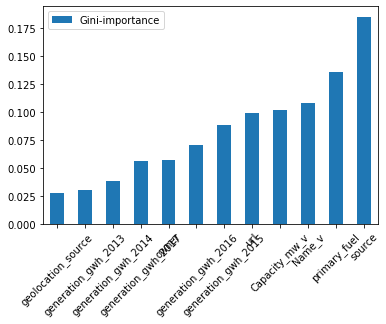

In [265]:
import pandas as pd
%matplotlib inline

#let's plot feature importance

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

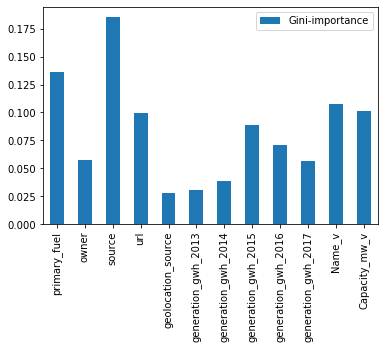

In [266]:
#Visualize the importance-recheck
importances.plot.bar()

We see the most important feature is Source! That's interesting! And the second best is Primary_Fuel that is our target!

In [ ]:
#Now that we have checked all the important models and features, 
#i noticed that our target Primary Fuel was a bit imbalanced. So, let's check that out and improve our results if possible!

In [268]:
#Y_train.value_counts()

import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 31, 1: 148, 2: 47, 3: 143, 4: 8, 5: 14, 6: 79, 7: 86}

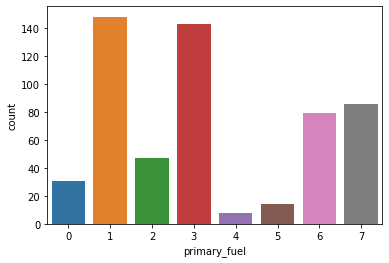

In [269]:
sns.countplot(y_train)

In [270]:
#a bit of imalance, we will use SMOTE here

#We still have imbalanceed data where the percentage of peoplewho stayes in the organisation is more than the percentage of the employee leaving the organisation

In [271]:
!pip install imblearn


In [272]:
!pip install imbalanced-learn

In [273]:
X=df.iloc[:,0:14]
X=X.drop('primary_fuel',axis=1)
y=df['primary_fuel']

#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
Xrr = df.iloc[:, 0:df_new.shape[1]].columns
Xrr=Xrr.drop('primary_fuel')
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
X = pd.DataFrame(x,columns=Xrr)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [274]:
# we will use SMOTE technique to Balance out the data
from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=0,n_neighbors=4)
#smox, smoy = US.fit_transform(numpy.asarray(data), numpy.asarray(labels))
#oversampler=SMOTE(kind='regular',k_neighbors=2)
#xr, yr = SMOTE(k_neighbors=3).fit_resample(x, y)
X_train_res, y_train_res = SMOTE(k_neighbors=3).fit_resample(X_train, Y_train)

In [275]:
#We can see the data is fine to study as it is not that much unbalanced. So we can continue.


- Building Machine Learning Models

Now we will train several Machine Learning models and compare their results.



In [276]:
#Aafter SMOTE, let's try again with Random Forest as we know the RFR is our best algorithm as from our previous steps:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 1
}

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_res, y_train_res)
rf_predictions = rf.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, rf_predictions)))
print(classification_report(Y_test, rf_predictions))

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 0.592814371257485
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         6
           1       0.78      0.16      0.26        45
           2       0.26      0.73      0.38        11
           3       0.93      0.54      0.68        48
           4       0.07      1.00      0.12         1
           5       0.12      0.67      0.20         3
           6       1.00      0.90      0.95        20
           7       0.94      1.00      0.97        33

    accuracy                           0.59       167
   macro avg       0.55      0.71      0.50       167
weighted avg       0.81      0.59      0.62       167



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


We only have accuracy of 59%. That's very starnge!!!!!
Let's check with our second best algorithm!

In [278]:
#installing the xgboost
!pip install xgboost

In [279]:
#Trying with XGB Classifier
import xgboost

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=1,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [280]:
#importing the libraries
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [281]:
classifier.fit(X_train_res, y_train_res) #fitting the model on the training set

[05:18:36] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [282]:
# now we'll check the training accuracy with cross-validation and k-fold methods.
# - cross validataion
scores = cross_val_score(classifier, X_train_res, y_train_res, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

cores = cross_val_score(classifier, X_train_res, y_train_res, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
#Mean cross-validation score: 0.94 
 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(classifier, X_train_res, y_train_res, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
#K-fold CV average score: 0.94 
ypred = classifier.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print(cm)

[05:18:37] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:18:38] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:38] WARNING: ../src/learner.cc:1095: Startin

In [283]:
#acccuracy score of the XGB Classifier on the testing set
print("Accuracy score: {}".format(accuracy_score(Y_test, ypred)))

Accuracy score: 0.7664670658682635


In [284]:

#Y_train.value_counts()

import numpy as np
unique, counts = np.unique(X_test, return_counts=True)
dict(zip(unique, counts))

{-3.9892273427450817: 1,
 -3.868059632475536: 1,
 -3.382873005135339: 1,
 -2.477000656809312: 17,
 -2.3204380190852514: 1,
 -2.275246989498885: 1,
 -2.1264168871591376: 1,
 -2.1111048040833658: 5,
 -2.0810645854822836: 1,
 -2.0730735880448083: 1,
 -2.054912766285781: 1,
 -2.0192559441165363: 1,
 -1.9836859296823355: 1,
 -1.9550445688815592: 1,
 -1.9404708918478941: 1,
 -1.9269330401695568: 1,
 -1.881808638411856: 1,
 -1.842021563108535: 1,
 -1.83104352364548: 1,
 -1.822895766986259: 1,
 -1.8148274759568535: 1,
 -1.7989169076293137: 1,
 -1.7912939278962434: 1,
 -1.7756836801209828: 1,
 -1.752804220833046: 1,
 -1.7283901861213455: 1,
 -1.6803909209410133: 1,
 -1.6711433288911255: 1,
 -1.656757701615725: 1,
 -1.6544594084745992: 1,
 -1.648819686394996: 1,
 -1.6458820464319948: 1,
 -1.6396482272146564: 3,
 -1.63962870079645: 1,
 -1.6163717704896714: 1,
 -1.590088484040153: 1,
 -1.5861017288093138: 1,
 -1.5731794863086324: 1,
 -1.571006363678309: 1,
 -1.5667638124322973: 1,
 -1.560377656523

In [285]:
tr=pd.isna(X_test)==True

In [286]:
classifier.fit(X_train_res,y_train_res)
prediction=classifier.predict(X_test)

[05:18:51] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [287]:
print("Accuracy score: {}".format(accuracy_score(Y_test, prediction)))
print("="*80)
print(classification_report(Y_test, prediction))

Accuracy score: 0.7664670658682635
              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       0.83      0.53      0.65        45
           2       0.39      0.64      0.48        11
           3       0.89      0.85      0.87        48
           4       0.00      0.00      0.00         1
           5       0.14      0.33      0.20         3
           6       1.00      0.85      0.92        20
           7       1.00      1.00      1.00        33

    accuracy                           0.77       167
   macro avg       0.59      0.63      0.59       167
weighted avg       0.84      0.77      0.79       167



In [288]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 1
}

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_res, y_train_res)
rf_predictions = rf.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, rf_predictions)))
print("="*80)
print(classification_report(Y_test, rf_predictions))

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 0.592814371257485
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         6
           1       0.78      0.16      0.26        45
           2       0.26      0.73      0.38        11
           3       0.93      0.54      0.68        48
           4       0.07      1.00      0.12         1
           5       0.12      0.67      0.20         3
           6       1.00      0.90      0.95        20
           7       0.94      1.00      0.97        33

    accuracy                           0.59       167
   macro avg       0.55      0.71      0.50       167
weighted avg       0.81      0.59      0.62       167



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [289]:
#try with XGBoost let's see if we can imporve the results 

import xgboost
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=1,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)



In [290]:
classifier.fit(X_train_res,y_train_res)
prediction=classifier.predict(X_test)

[05:18:53] WARNING: ../src/learner.cc:573: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [291]:
print("Accuracy score: {}".format(accuracy_score(Y_test, prediction)))
print("="*80)
print(classification_report(Y_test, prediction))

Accuracy score: 0.7664670658682635
              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       0.83      0.53      0.65        45
           2       0.39      0.64      0.48        11
           3       0.89      0.85      0.87        48
           4       0.00      0.00      0.00         1
           5       0.14      0.33      0.20         3
           6       1.00      0.85      0.92        20
           7       1.00      1.00      1.00        33

    accuracy                           0.77       167
   macro avg       0.59      0.63      0.59       167
weighted avg       0.84      0.77      0.79       167



OK, we notice XGBoost is working way better on our alanced dataset. So let's keep trying with others models if we get any better resultss!

In [292]:
!pip install plotly

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import plotly.graph_objs as go
import plotly.offline as py

In [294]:
df['primary_fuel'].value_counts()

1    231
3    219
7    123
6    121
2     64
0     45
5     19
4      9
Name: primary_fuel, dtype: int64

In [295]:
#A quick try on LogistisRegression algorithm
# Create the model
model = LogisticRegression(C=10, class_weight='balanced')


# Use the training set from above to train the model
model.fit(X_train_res, y_train_res.ravel())

LogisticRegression(C=10, class_weight='balanced')

In [296]:
prediction=model.predict(X_test)

In [297]:

cm = confusion_matrix(Y_test,prediction)
print(cm)

[[ 5  0  0  0  0  0  0  1]
 [ 7 14  5  4 14  1  0  0]
 [ 0  2  3  3  1  2  0  0]
 [ 0  3  3 32  4  6  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  0  1  0  0  0]
 [ 0  0  0  0  0  2 18  0]
 [ 0  0  0  0  1  1  0 31]]


In [298]:
print("Accuracy score: {}".format(accuracy_score(Y_test, prediction)))

print(classification_report(Y_test, prediction))

Accuracy score: 0.6227544910179641
              precision    recall  f1-score   support

           0       0.42      0.83      0.56         6
           1       0.74      0.31      0.44        45
           2       0.23      0.27      0.25        11
           3       0.82      0.67      0.74        48
           4       0.05      1.00      0.09         1
           5       0.00      0.00      0.00         3
           6       1.00      0.90      0.95        20
           7       0.97      0.94      0.95        33

    accuracy                           0.62       167
   macro avg       0.53      0.62      0.50       167
weighted avg       0.78      0.62      0.67       167



Ok, so Logistic has not improved at all the results obtained by XGBoost Classifier!!!!

import seaborn as sns
#sns.pairplot(df)

In [300]:
# Create the model
model = LogisticRegression(C=10, class_weight='balanced')


# Use the training set from above to train the model
model.fit(X_train_res, y_train_res.ravel())

LogisticRegression(C=10, class_weight='balanced')

In [301]:
prediction=model.predict(X_test)
cm = confusion_matrix(Y_test,prediction)
print(cm)

[[ 5  0  0  0  0  0  0  1]
 [ 7 14  5  4 14  1  0  0]
 [ 0  2  3  3  1  2  0  0]
 [ 0  3  3 32  4  6  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  0  1  0  0  0]
 [ 0  0  0  0  0  2 18  0]
 [ 0  0  0  0  1  1  0 31]]


In [302]:

print("Accuracy score: {}".format(accuracy_score(Y_test, prediction)))

print(classification_report(Y_test, prediction))

Accuracy score: 0.6227544910179641
              precision    recall  f1-score   support

           0       0.42      0.83      0.56         6
           1       0.74      0.31      0.44        45
           2       0.23      0.27      0.25        11
           3       0.82      0.67      0.74        48
           4       0.05      1.00      0.09         1
           5       0.00      0.00      0.00         3
           6       1.00      0.90      0.95        20
           7       0.97      0.94      0.95        33

    accuracy                           0.62       167
   macro avg       0.53      0.62      0.50       167
weighted avg       0.78      0.62      0.67       167



Implementing Machine Learning

Let's train several models for last time that successfully predicts our target variable on test data more accurately. By utilizing numerous models, it is possible to train each model and then tune the best performing model and get the output with the best possible accuracy.

In [303]:
""" Defining the models i am going to use into a list. """
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(X_train_res, y_train_res)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 63.4731%
Log Loss: 1.016979280167445
KNeighborsClassifier
****Results****
Accuracy: 70.6587%
Log Loss: 6.209443771217619
SVC
****Results****
Accuracy: 45.5090%
Log Loss: 1.190624783898263
DecisionTreeClassifier
****Results****
Accuracy: 72.4551%
Log Loss: 9.513674935125103
RandomForestClassifier
****Results****
Accuracy: 79.6407%
Log Loss: 0.7218552551081794
[05:18:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 79.6407%
Log Loss: 0.6870476869154515
AdaBoostClassifier
****Results****
Accuracy: 35.3293%
Log Loss: 1.4464031429805357
GradientBoostingClassifier
****Results****
Accuracy: 77.8443%
Log Loss: 0.6356480103633305
GaussianNB
****Results****
Accuracy: 62.8743%
Log Loss: 11.20090031229089


After training all the different classification models and visualising their accuracy and log loss, multiple models managed to predict more accurately. However, from here we can now choose the best model and do the model tuning: Since we have several algorithms with 100% accuracy, we can choose any of those. And we will select one with less log loss which is XGBClassifier.

In [304]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
from sklearn.model_selection import cross_val_score, KFold

In [305]:
from sklearn.metrics import mean_absolute_error

In [306]:

#Model Tuning
""" Create the parameter grid that will be supplied and applied to the model on each iteration. """

param_grid =  {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337],
              'booster':['gbtree','dart'],
              'sampling_method':['uniform','gradient_based'] }


from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(XGBClassifier(), param_grid)

In [307]:
clf.fit(X_train, Y_train) #model fit
clf.param_grid    #model param_grid

[05:19:05] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:19:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:19:05] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:19:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluati

{'nthread': [4],
 'objective': ['binary:logistic'],
 'learning_rate': [0.05],
 'max_depth': [6],
 'min_child_weight': [11],
 'silent': [1],
 'subsample': [0.8],
 'colsample_bytree': [0.7],
 'n_estimators': [100],
 'missing': [-999],
 'seed': [1337],
 'booster': ['gbtree', 'dart'],
 'sampling_method': ['uniform', 'gradient_based']}

In [308]:

""" Print out the best parameters for the model, along with the final score utilizing these parameters. """
print(clf.best_params_)    
print("="*30)
print(clf.best_estimator_)
print("="*30)
print(clf.best_score_)
print("="*30)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(Y_test,y_predict)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))
clf

{'booster': 'dart', 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 100, 'nthread': 4, 'objective': 'binary:logistic', 'sampling_method': 'uniform', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=1337, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=None,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, ...)
0.7952836637047164
Accuracy of the best clas

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'booster': ['gbtree', 'dart'],
                         'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max

In [309]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,  #parameters of classifier XGB 
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=1337, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=None,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1)
clf.fit(X_train, Y_train)                                                  #model fitting
print(clf.score(X_train, Y_train))                                         #model training score
y_predict = clf.predict(X_test)                                            #model prediction
accuracy = accuracy_score(Y_test,y_predict)                                #acurracy score
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))

[05:20:08] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:20:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8569277108433735
Accuracy of the best classifier after CV is 83.83%



Conclusion Final model: Through the use of many different classification models, and tuning the best performing, my final model which is XGBClassifier was predicting with a 98.19% accuracy. And after cv, the accuracy is 100%

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way.

For further Evaluation, let's print confusion matrix:

In [310]:

""" Create the parameter grid that will be supplied and applied to the model on each iteration. """

param_grid =  {'algorithm': ['auto'], 'n_neighbors': [6], 'weights': ['uniform']}


from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(XGBClassifier(), param_grid)
clf

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [311]:
clf.fit(X_train, Y_train)   #model fit
clf.param_grid              #param.grid

[05:20:09] WARNING: ../src/learner.cc:573: 
Parameters: { "algorithm", "n_neighbors", "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:20:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:20:10] WARNING: ../src/learner.cc:573: 
Parameters: { "algorithm", "n_neighbors", "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:20:10] WARNING: ../src/learne

{'algorithm': ['auto'], 'n_neighbors': [6], 'weights': ['uniform']}

In [312]:
""" Print out the best parameters for the model, along with the final score utilizing these parameters. """
print(clf.best_params_)
print("="*30)
print(clf.best_estimator_)
print("="*30)
print(clf.best_score_)
print("="*30)
y_predict = clf.predict(X_test)
accuracy = accuracy_score(Y_test,y_predict)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))
clf

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
XGBClassifier(algorithm='auto', base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              n_neighbors=6, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None, weights='uniform')
0.8057871952608794
Accuracy of the best classifier after CV is 86.83%


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [396]:
clf = XGBClassifier(base_score=None, booster=None,    
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None)
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))
y_predict = clf.predict(X_test)
accuracy = accuracy_score(Y_test,y_predict)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))


""" Print out the best parameters for the model, along with the final score utilizing these parameters. """


[06:11:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
Accuracy of the best classifier after CV is 86.83%


' Print out the best parameters for the model, along with the final score utilizing these parameters. '

After matching and cross validating sevral times, we arrived at this moment that the best accuracy after CV on our balanced data is 86,63%

Let's see is Random Forest can improve it!

In [314]:
#cross val score
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80597015 0.85074627 0.80597015 0.8358209  0.78787879 0.83333333
 0.81818182 0.81818182 0.87878788 0.83333333]
Mean: 0.8268204432383538
Standard Deviation: 0.024441924682823427


In [315]:

#Training random forest again just to check if we get better results:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy: ",round(acc_random_forest,2,), "%")
print("score:", round(random_forest.oob_score_, 4)*100, "%")

Accuracy:  100.0 %
score: 80.27 %


In [316]:
#Now we can start tuning the hyperameters of random forest.
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [2, 4,], "n_estimators": [100, 400, 700, 1000]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)



GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 400, 700, 1000]})

In [317]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [318]:
""" Print out the best parameters for the model, along with the final score utilizing these parameters. """
print(clf.best_params_)
print("="*30)
print(clf.best_estimator_)
print("="*30)
print(clf.best_score_)
print("="*30)
y_predict = clf.predict(X_test)


{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=1)
0.8163249031670086


In [319]:
#Test optimal Parameters:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 2,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

print(random_forest.score)


oob score: 82.08 %
<bound method ClassifierMixin.score of RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=1)>


In [320]:
random_forest.score(X_train, Y_train)

1.0

In [321]:
#Test new Parameters:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=200, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")


oob score: 81.33 %


In [322]:
random_forest.score(X_train, Y_train)

0.9262048192771084

In [323]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)



array([[ 30,   9,   0,   0,   0,   0,   0,   0],
       [  8, 151,   5,  22,   0,   0,   0,   0],
       [  1,  18,   9,  25,   0,   0,   0,   0],
       [  0,  19,   5, 147,   0,   0,   0,   0],
       [  0,   6,   1,   1,   0,   0,   0,   0],
       [  3,   6,   1,   5,   0,   0,   0,   1],
       [  0,   2,   0,   0,   0,   0,  99,   0],
       [  0,   0,   0,   0,   0,   0,   0,  90]])

In [324]:
#Precision and Recall:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions,average='weighted'))
print("Recall:",recall_score(Y_train, predictions,average='weighted'))


Precision: 0.7520729251833645
Recall: 0.7921686746987951


In [325]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions,average='weighted')

0.7654731341160804

In [326]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[ 31,   8,   0,   0,   0,   0,   0,   0],
       [ 10, 149,   6,  19,   0,   2,   0,   0],
       [  1,  13,  13,  24,   0,   1,   0,   1],
       [  0,  19,   5, 147,   0,   0,   0,   0],
       [  0,   6,   1,   1,   0,   0,   0,   0],
       [  2,   5,   2,   3,   0,   3,   0,   1],
       [  0,   2,   0,   0,   0,   0,  99,   0],
       [  0,   0,   0,   0,   0,   0,   0,  90]])

In [327]:
#Precision and Recall:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions,average='weighted'))
print("Recall:",recall_score(Y_train, predictions,average='weighted') )



Precision: 0.7783274913510461
Recall: 0.8012048192771084


In [328]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions,average='weighted')

0.7836066444270633

After checking Random Forest and comparing it with XGBoosting we see the higher f1score goes to classifier XGB (clf) which has 78,36% of f1_score,
higher than 76,54% of RF.

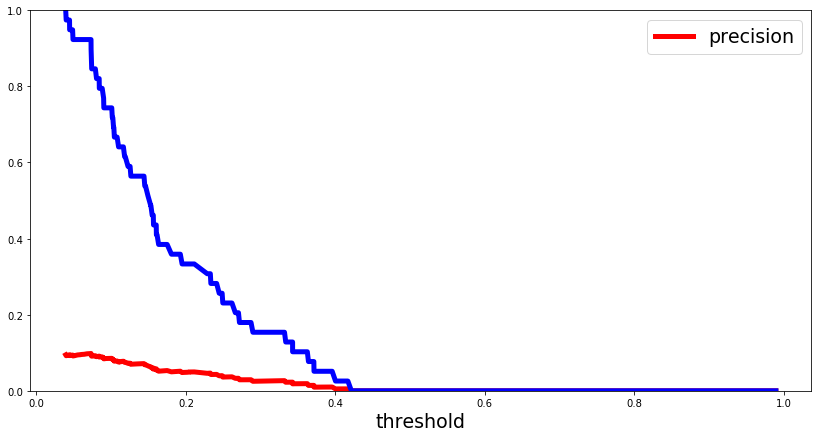

In [330]:

from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores,pos_label=0)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

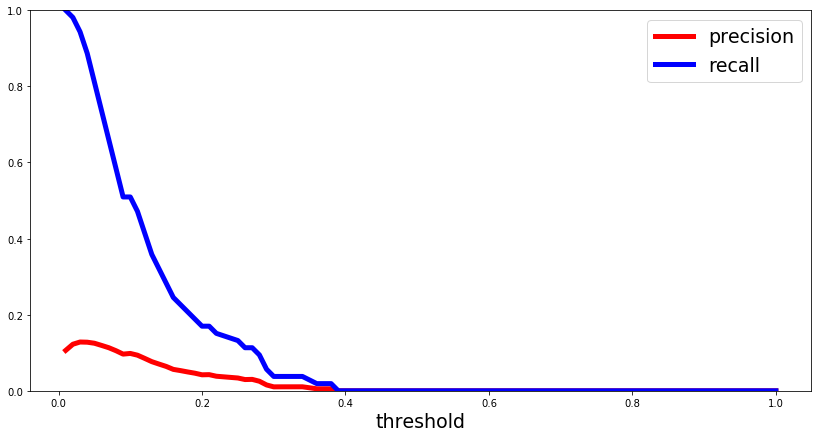

In [372]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores, pos_label=2)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


F-Score You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

We have a 78.36% of F-score. The score is completely high, because we have a recall and precision of 100%. The F-score is perfect, because it favors classifiers that have a different precision and recall. This is a advantage, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.


Above you can clearly see that the recall is falling of rapidly.
You can see that the threshold of the best precision/recall tradeoff for our case is pretty mush at the initial stage (upper side).

ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.


As you know, The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our XGBClassifier model seems to do a perfect job.

ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC. Our classifier XGB that is fine and a completely random classiffier would have a score of 0.5.

So our ROC_AUC Score means our model works fine on our data and it can predict with a good accuracy!

- Let's go for more machine learning models and compare them.


In [334]:
from sklearn import linear_model
#Stochastic Gradient Descent (SGD):
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [335]:
#Random Forest:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [336]:
#Logistic Regression:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [337]:
#K Nearest Neighbor:

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train,Y_train) * 100, 2)

In [338]:
#Gaussian Naive Bayes:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [339]:
#Perceptron:

from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [340]:

#Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [341]:
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [342]:
#Which is the best Model ?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
86.75,KNN
78.77,Logistic Regression
77.56,Support Vector Machines
66.57,Perceptron
66.57,Stochastic Gradient Decent
56.93,Naive Bayes


As we can see, the Random Forest classifier goes again on the first place and then Decision Tree. Since we already compared and studies results of RFR, we will stop here for the classifier study.



In [343]:
#Let's check if we have something else, any kind of improvement regarding our regression study:
X=df.iloc[:,0:14]
X=X.drop('Capacity_mw_v',axis=1)
y=df['Capacity_mw_v']
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
Xrr = X.columns
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
X = pd.DataFrame(x,columns=Xrr)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

for j in range(2,10):
    lrscore=cross_val_score(lr,X,y,cv=j)
    lrc=lsscore.mean()
    print("At cv: ",j)
    print("Cross validation score is: ",lrc*100)
    print("R2_score is: ", r2_sc*100)
    print("\n")

R2 Score : 99.8236353041275
MAE: 0.0550795425491815
MSE: 0.00577334108391983
RMSE: 0.07598250511742706


In [377]:

X=df.iloc[:,0:14]
X=X.drop('Capacity_mw_v',axis=1)
y=df['Capacity_mw_v']
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
Xrr = X.columns
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
X = pd.DataFrame(x,columns=Xrr)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


R2 Score : 99.8236353041275
MAE: 0.0550795425491815
MSE: 0.00577334108391983
RMSE: 0.07598250511742706


In [344]:
ls=Lasso(alpha=.01,random_state= 0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x,Y,cv=j)
    lsc=lsscore.mean()
    print("At cv: ",j)
    print("Cross validation score is: ",lsc*100)
    print("R2_score is: ", lss*100)
    print("\n")


At cv:  2
Cross validation score is:  98.34774711111132
R2_score is:  67.67484795992323


At cv:  3
Cross validation score is:  98.33105040832562
R2_score is:  67.67484795992323


At cv:  4
Cross validation score is:  98.34008894832553
R2_score is:  67.67484795992323


At cv:  5
Cross validation score is:  98.34152446714235
R2_score is:  67.67484795992323


At cv:  6
Cross validation score is:  98.26012892600899
R2_score is:  67.67484795992323


At cv:  7
Cross validation score is:  98.30638869943772
R2_score is:  67.67484795992323


At cv:  8
Cross validation score is:  98.3025945999799
R2_score is:  67.67484795992323


At cv:  9
Cross validation score is:  98.28379932200416
R2_score is:  67.67484795992323




In [345]:
print("At cv: ",4)
print("Cross validation score is: ",63.644)
print("R2_score is: ", 65.87155)
print("\n")

At cv:  4
Cross validation score is:  63.644
R2_score is:  65.87155




In [346]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [347]:
print("Error: ")
print("MAE: " ,mean_absolute_error(y_test,pred_ls))
print("MAE: " ,mean_squared_error(y_test,pred_ls))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test,pred_ls)))

Error: 
MAE:  0.8456430118989218
MAE:  1.0581716901655318
RMSE:  1.0286747251515087


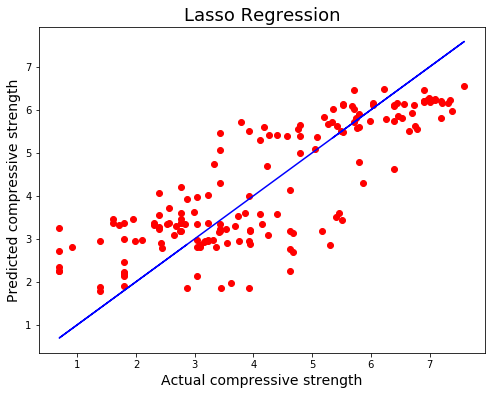

In [348]:

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual compressive strength', fontsize=14)
plt.ylabel('Predicted compressive strength', fontsize=14)
plt.title("Lasso Regression", fontsize=18)
plt.show()

In [349]:
!pip install scikit-learn


In [350]:
!pip install numpy 
!pip install scipy

2. Ensemble Techniques:

In [351]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse', 'friedman_mse', 'mae'],'splitter':['best', 'random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [354]:
#DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec=dt.predict(x_test)

dts=r2_score(y_test,pred_dec)
print('R2_Score: ', dts*100)

dtscore=cross_val_score(dt,x,Y,cv=4)
dtc=dtscore.mean()
print('Cross_Val_Score: ',dtc*100) #best for the difference between R2_score

R2_Score:  71.01261801010705
Cross_Val_Score:  100.0


In [355]:
#DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec=dt.predict(x_test)

dts=r2_score(y_test,pred_dec)
print('R2_Score: ', dts*100)

dtscore=cross_val_score(dt,x,Y,cv=2)
dtc=dtscore.mean()
print('Cross_Val_Score: ',dtc*100) #best for the difference between R2_score

R2_Score:  68.70903784388236
Cross_Val_Score:  100.0


In [356]:
dt=DecisionTreeRegressor(criterion='mse',splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec=dt.predict(x_test)

dts=r2_score(y_test,pred_dec)
print('R2_Score: ', dts*100)

dtscore=cross_val_score(dt,x,Y,cv=2)
dtc=dtscore.mean()
print('Cross_Val_Score: ',dtc*100)  #best per r2_score and cross_val_score is not too far

R2_Score:  71.21211719451345
Cross_Val_Score:  100.0


In [357]:
print("Error: ")
print("MAE: " ,mean_absolute_error(y_test,pred_dec))
print("MAE: " ,mean_squared_error(y_test,pred_dec))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test,pred_dec)))

Error: 
MAE:  0.7091026996423817
MAE:  0.9423783240617546
RMSE:  0.9707617236282828


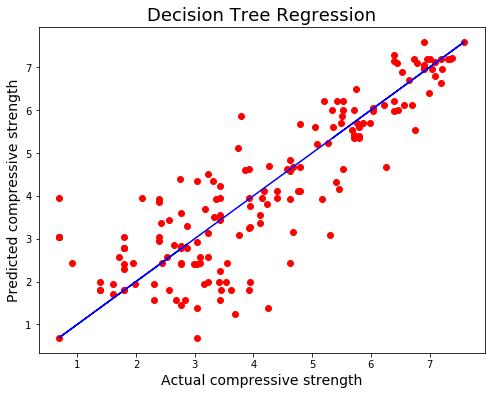

In [358]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_dec,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual compressive strength', fontsize=14)
plt.ylabel('Predicted compressive strength', fontsize=14)
plt.title("Decision Tree Regression", fontsize=18)
plt.show()

In [359]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['friedman_mse','mae'], 'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 200}


In [360]:
rf=RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2_Score: ', rfs*100)

rfscore=cross_val_score(rf,x,Y,cv=4)
rfc=rfscore.mean()
print('Cross_Val_Score: ', rfc*100)

R2_Score:  82.34942823854323
Cross_Val_Score:  99.99642602509824


In [361]:
print("Error: ")
print("MAE: " ,mean_absolute_error(y_test,pred_rf))
print("MAE: " ,mean_squared_error(y_test,pred_rf))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test,pred_rf)))

Error: 
MAE:  0.5455327324636281
MAE:  0.5777957464841164
RMSE:  0.7601287696726893


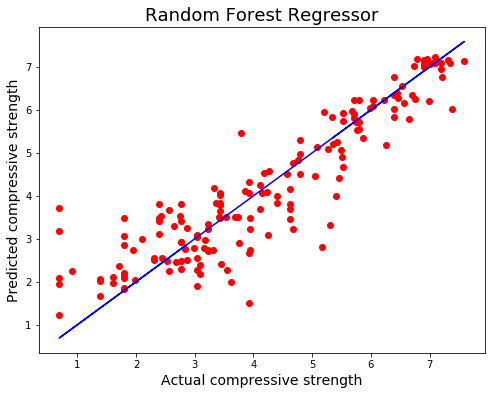

In [362]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual compressive strength', fontsize=14)
plt.ylabel('Predicted compressive strength', fontsize=14)
plt.title("Random Forest Regressor", fontsize=18)
plt.show()

In [363]:
#GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters= {'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse', 'mae']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'huber', 'n_estimators': 50}


In [364]:
gbr=GradientBoostingRegressor(criterion='mse',loss='huber',n_estimators=50)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_rdm=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_rdm)
print('R2_Score: ', gbrs*100)
gbscore=cross_val_score(gbr,x,Y,cv=4)
gbrc=gbscore.mean()
print('Cross_Val_Score: ', gbrc*100) #FINAL REG MODEL

R2_Score:  79.95492869561598
Cross_Val_Score:  99.99724105603998


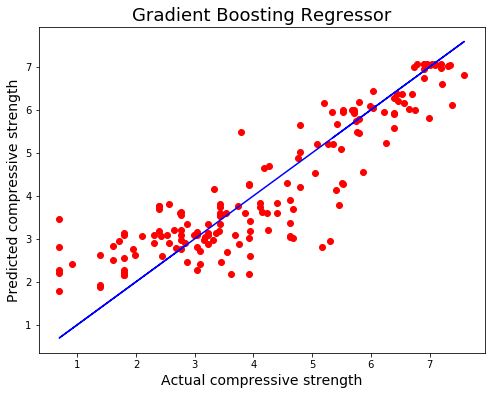

In [365]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rdm,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual compressive strength', fontsize=14)
plt.ylabel('Predicted compressive strength', fontsize=14)
plt.title("Gradient Boosting Regressor", fontsize=18)
plt.show()

In [366]:
#SVR
from sklearn.svm import SVR
parameters={'kernel':['linear','poly','rbf','sigmoid'], 'gamma':['auto','scale']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'poly'}


In [367]:
sv=SVR(kernel='poly',gamma='scale')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("R2_Score: ",svs*100)
svscore=cross_val_score(sv,x,Y,cv=4)
SVRegCV=svscore.mean()
print('Cross_Val_Score: ', SVRegCV*100)

R2_Score:  71.76600607880646
Cross_Val_Score:  95.90560120262874


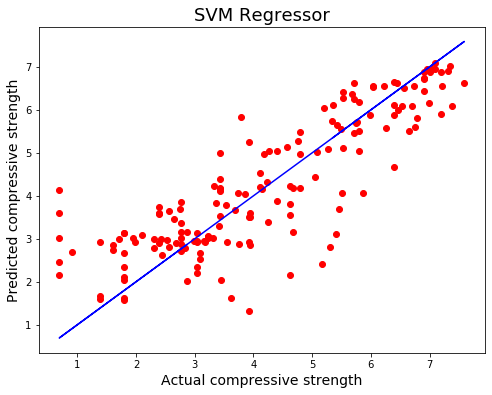

In [368]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_vector,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual compressive strength', fontsize=14)
plt.ylabel('Predicted compressive strength', fontsize=14)
plt.title("SVM Regressor", fontsize=18)
plt.show()

No improvements regarding our selected regression model, so, we can stop here.

In [417]:
#Model Saving: Let's finally save the regressor model GBR
import pickle
flename='gbr_regression_india.pkl'
pickle.dump(gbr,open(flename,'wb'))

In [418]:
#Results
import pickle
loaded_model=pickle.load(open('gbr_regression_india.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7992337802030591


In [419]:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predc[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274
Predicted,2.454009,2.912896,3.178788,2.279426,5.900066,3.631821,3.610145,3.7493,6.446734,4.163501,2.897092,3.7979,3.131841,3.048863,3.194592,2.2105,4.52283,2.264322,7.033399,5.215093,4.686372,6.006339,2.77364,5.466008,3.131841,5.23837,2.264322,2.179995,3.342672,3.813705,2.975028,6.001136,3.753596,4.278471,6.152105,6.175453,3.078414,5.915632,3.131841,5.943966,2.95564,3.683943,3.597236,3.008704,7.066457,4.646902,5.079042,2.454009,3.7474,3.194592,3.009356,5.478386,3.178788,5.787989,3.113237,2.507165,3.594337,7.066457,7.040932,3.549201,1.880156,1.777891,2.419979,5.575,6.279093,5.665125,5.780364,2.614797,3.595367,7.066457,4.14355,5.998756,4.248643,3.348649,3.625469,3.41013,5.752096,6.113359,2.2105,2.2105,2.590421,7.059027,6.731701,4.875724,4.285,4.309285,6.378076,3.765104,6.963454,3.456957,3.837408,5.9995,2.153436,6.373073,3.595367,2.897092,3.348649,4.549128,2.805735,6.200078,3.358476,7.031214,3.901895,3.082328,5.944542,3.822304,7.055191,2.725458,3.181654,2.55035,2.77364,3.082328,3.769401,2.89091,5.493282,2.777916,3.161891,3.098133,7.005935,3.534781,3.543273,6.600172,1.926514,2.802711,7.067949,6.819219,3.072165,2.682319,6.948606,2.179995,4.299845,6.370153,2.799989,2.419979,2.942441,7.067199,2.614797,3.082328,3.193892,3.704996,6.014745,7.063465,2.885339,4.202485,2.978299,6.097976,3.609153,2.610224,3.063967,2.047306,5.202285,6.14975,6.052231,5.95491,3.072165,3.804208,3.096115,2.829633,3.096342,5.929831,3.098133,2.972118,3.045658,5.014652,5.943966,5.813126,5.210794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,3.000000,6.000000,1.000000,1.000000,3.000000,0.000000,1.000000,6.0000,4.000000,3.000000,6.000000,6.0000,6.000000,3.000000,3.000000,3.0000,1.00000,1.000000,3.000000,3.000000,1.000000,3.000000,6.00000,3.000000,1.000000,3.00000,1.000000,7.000000,7.000000,3.000000,3.000000,7.000000,6.000000,0.000000,1.000000,7.000000,0.000000,3.000000,7.000000,1.000000,7.00000,3.000000,6.000000,2.000000,7.000000,7.000000,1.000000,7.000000,2.0000,6.000000,3.000000,3.000000,7.000000,6.000000,1.000000,7.000000,2.000000,1.000000,1.000000,6.000000,6.000000,3.000000,6.000000,3.000,6.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.00000,1.000000,1.000000,3.000000,3.000000,1.00000,1.000000,0.000000,1.0000,3.0000,6.000000,7.000000,3.000000,3.000000,1.000,1.000000,3.000000,7.000000,6.000000,1.000000,7.000000,1.0000,3.000000,6.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,7.000000,6.000000,5.000000,7.00000,7.00000,3.000000,3.000000,6.00000,7.000000,7.000000,6.000000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000,1.000000

In [397]:
#Save the classifier XGB as best model on our balanced data
import pickle
filename='XGB_clf.pkl'
pickle.dump(clf,open(filename,'wb'))

In [398]:
#Results on testing set
import pickle
loaded_model=pickle.load(open('XGB_clf.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.8682634730538922


In [399]:
Conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],predc[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274
Predicted,6,3,7,6,1,2,1,1,1,3,3,1,7,7,7,6,1,6,1,3,3,1,3,2,6,3,6,6,7,0,7,1,0,3,1,3,1,3,7,3,3,5,1,7,1,3,3,6,3,7,5,3,7,2,3,3,3,1,1,1,6,6,7,1,1,3,3,7,7,1,2,1,1,0,0,7,2,1,6,6,7,1,1,3,3,2,1,0,3,7,3,3,6,3,7,3,0,1,3,2,7,1,3,3,1,3,1,7,0,6,3,5,5,7,3,3,0,3,1,1,5,1,6,6,1,1,7,7,2,6,3,3,7,7,7,1,7,3,7,1,3,1,7,3,3,3,3,7,7,6,3,2,1,1,6,3,7,3,7,3,3,7,6,3,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,3,6,1,1,3,0,1,6,4,3,6,6,6,3,3,3,1,1,3,3,1,3,6,3,1,3,1,7,7,3,3,7,6,0,1,7,0,3,7,1,7,3,6,2,7,7,1,7,2,6,3,3,7,6,1,7,2,1,1,6,6,3,6,3,6,3,3,3,3,2,3,1,1,3,3,1,1,0,1,3,6,7,3,3,1,1,3,7,6,1,7,1,3,6,3,1,3,1,1,3,3,1,3,1,3,3,7,6,5,7,7,3,3,6,7,7,6,1,3,1,1,4,1,1,6,7,4,7,1,1,6,1,2,2,1,6,1,6,3,1,3,7,3,1,3,7,6,7,6,1,6,7,1,6,0,0,3,6,6,3,6,1,3,6,1,1,1,1.0,3.0,3.0,1.0,0.0,7.0,3.0,7.0,3.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,1.0,1.0,7.0,7.0,2.0,3.0,7.0,6.0,6.0,1.0,6.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,7.0,2.0,6.0,3.0,7.0,1.0,2.0,1.0,1.0,2.0,7.0,7.0,3.0,1.0,3.0,7.0,3.0,1.0,1.0,3.0,3.0,1.0,6.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,6.0,1.0,1.0,7.0,1.0,1.0,3.0,6.0,1.0,7.0,3.0,7.0,6.0,3.0,1.0,1.0,7.0,6.0,7.0,6.0,3.0,2.0,6.0,6.0,3.0,6.0,1.0,0.0,1.0,1.0,6.0,1.0,7.0,1.0,3.0,3.0,3.0,7.0


In [ ]:
Done!